# **Projet IA : HumanForYou**

# **Livrable 3 : Analyse Prédictive de l'Attrition pour HumanForYou**


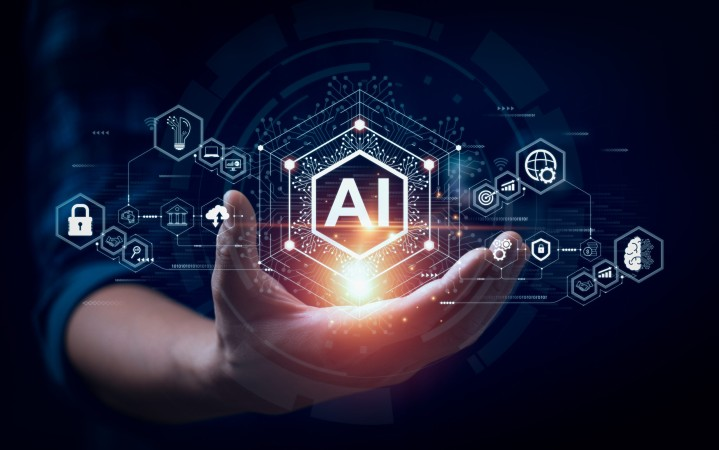

# <u>**Sommaire**</u>

## <u>**I. Introduction**</u>
- ### A. Contexte du Projet
- ### B. Définition du problème

## <u>**II. Génération et Préparation des Jeux de Données**</u>
- ### A. Importation des bibliothèques

- ### B. Caractéristiques des Données
 - Importation des données.
 - Description des données.

- ### C. Traitement des Données
 - Pré-Traitement des données de temps.
 - Gestion des valeurs manquantes.
 - Suppression des doublons.
 - Gestion des valeurs aberrantes.
 - Fusion des datasets.
 - Ethique.
 - One-Hot Encoding
 - Normalisation des données

- ### D. Division des Données
 - Répartition en ensemble d'entraînement, de validation et de test.

## <u>**III. Exploration et Visualisation des Données**</u>
- ### A. Boites à moustaches (Boxplots)
- ### B. Matrice de corrélation (Heatmap)
- ### C. Histogrammes

## <u>**IV. Choix des Modèles d'IA**</u>
- ### A. Etude des différents modéles
  - Régression Logistique
  - Perceptron
  - Support Vector Machine (SVM)
  - Naive Bayès
  - Decision Tree
  - Random Forest
- ### B. Entraînements et Prédictions
- ### C. Etude comparative entre les modèles SK-Learn
  - Principales Métriques
  - Affichage des matrices de confusion
  - Comparaison des courbes ROC
  - Calcul de statistiques pour comparer les modèles
  - Statistiques sous formes de tableau
  - Temps d'entraînement et de prédiction
- ### D. GridSearch et Hyperparamètres

## <u>**V. Comparaison des Modèles**</u>
- ### A. Courbes ROC des Modèles après Hyperparamètrisation
- ### B. Résumer des scores
- ### C. Comparaison des modèles

## <u>**VI. Interprétation des Résultats**</u>
- ### A. Étude des performances des modèles
  - ROC (Entraînement et Test)
  - Surapprentissage (Delta Entraînement-Test)
  - Temps d’entraînement
  - Temps de prédiction
- ### B. Conclusion et Choix du Modèle
- ### C. Calcul du pourcentage d'attrition à partir de Random Forest

## <u>**VII. Conclusion**</u>
- ### A. Propositions d'améliorations

# <u>**I. Introduction**</u>

Notre groupe se compose de :     
- GANDOUZ Akrem
- HEMRI Samy
- BOIVIN Pierre
- WYART Nathan

## **A. Contexte du Projet**

L'entreprise pharmaceutique HumanForYou, basée en Inde, emploie environ 4000 personnes. Cependant, chaque année, elle connaît un taux de rotation d'environ 15 % de ses employés, ce qui nécessite de trouver des profils similaires sur le marché de l'emploi.

La direction considère que ce niveau de rotation n'est pas bénéfique pour l'entreprise pour les raisons suivantes :

- Les projets sur lesquels travaillaient les employés quittant la société prennent du retard, ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Il est nécessaire de conserver un service des ressources humaines conséquent afin d'avoir les moyens de trouver de nouveaux employés.

- L'arrivée des nouveaux employés entraîne une perte de temps, car ils doivent souvent être formés et ont besoin d'un certain temps pour être pleinement opérationnels dans leur nouvel environnement.

La direction fait donc appel à nous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de rotation et pour proposer des modèles afin d'identifier des pistes d'amélioration permettant de motiver les employés à rester dans l'entreprise.


## **B. Définition du problème**






**Objectif principal :**


*   Identifier les facteurs qui influencent l'*attrition* des employés.
*  Construire un modèle permettant de prédire si un employé est susceptible de quitter l'entreprise.

**Nature du problème :**


* Type : Problème de classification supervisée (prédiction binaire : Attrition = "Yes" ou "No").
* Données disponibles : Variables catégoriques, numériques, qualitatives (évaluations, satisfaction).
* Performance attendue  : Maximiser la précision de prédiction tout en interprétant les résultats pour fournir des recommandations claires à l’entreprise.



# <u>**II. Génération et Préparation des Jeux de Données**</u>

## <u>**A. Importation des bibliothèques**</u>

Pour commencer, nous devons importer les différentes bibliothèques que nous allons utiliser. Ces bibliothèques nous serviront, par exemple, pour la génération des graphiques, l'évaluation des métriques, l'encodage, l'entraînement, etc...

In [65]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import os
import missingno as msno
import csv
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error, roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## <u>**B. Caractéristiques des Données**</u>

### <u>**Importation des données**</u>

In [ ]:
# Importation des datasets
general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
in_time_data = pd.read_csv('in_time.csv')
in_time_data.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_time_data = pd.read_csv('out_time.csv', quoting=csv.QUOTE_NONNUMERIC, on_bad_lines='skip', encoding='utf-8')
out_time_data.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

Nous avons importé nos différents datasets contenant les données. Pour les datasets relatifs au temps, nous avons renommé la colonne contenant les identifiants des employés, car celle-ci n’avait pas de nom. Cette modification facilitera le traitement des données par la suite.

### <u>**Description des données**</u>

Un certain nombre de données concernant les employés nous ont donc été transmises par le service des ressources humaines.

Il s'agit de fichiers texte au format CSV.

Les données ont été anonymisées : chaque employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

Pour chaque employé, le service des ressources humaines nous a confié leurs informations :

- **Age** : L'âge de l'employé en 2015.

- **Attrition** : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?

- **BusinessTravel** : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)

- **DistanceFromHome** : Distance en km entre le logement de l'employé et l'entreprise.

- **Education** : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).

- **EducationField** : Domaine d'étude, matière principale

- **EmployeeCount** : booléen à 1 si l'employé était compté dans les effectifs en 2015.

- **EmployeeId** : l'identifiant d'un employé

- **Gender** : Sexe de l'employé

- **JobLevel** : Niveau hiérarchique dans l'entreprise de 1 à 5

- **JobRole** : Métier dans l'entreprise

- **MaritalStatus** : Statut marital du salarié (Célibataire, Marié ou Divorcé).

- **MonthlyIncome** : Salaire brut en roupies par mois

- **NumCompaniesWorked** : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.

- **Over18** : Est-ce que le salarié a plus de 18 ans ou non ?

- **PercentSalaryHike** : % d'augmentation du salaire en 2015.

- **StandardHours** : Nombre d'heures par jour dans le contrat du salarié.

- **StockOptionLevel** : Niveau d'investissement en actions de l'entreprise par le salarié.

- **TotalWorkingYears** : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.

- **TrainingTimesLastYear** : Nombre de jours de formation en 2015

- **YearsAtCompany** : Ancienneté dans l'entreprise

- **YearsSinceLastPromotion** : Nombre d'années depuis la dernière augmentation individuelle

- **YearsWithCurrentManager** : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.

Afin de transfomer les données objets en binaire grâce à One-Hot Encoding, nous avons décider de créer de nouvelles colonnes :    
<br>

- **AverageHoursPerDay** : Moyenne des heures travaillées par jour par l'employé.

- **Absences** : Nombre d'absences de l'employé.
- **BusinessTravel_Non-Travel** : Indique si l'employé ne voyage pas pour le travail.
- **BusinessTravel_Travel_Frequently** : Indique si l'employé voyage fréquemment pour le travail.
- **BusinessTravel_Travel_Rarely** : Indique si l'employé voyage rarement pour le travail.
- **Department_Human Resources** : Indique si l'employé travaille dans le département des ressources humaines.
- **Department_Research & Development** : Indique si l'employé travaille dans le département de recherche et développement.
- **Department_Sales** : Indique si l'employé travaille dans le département des ventes.
- **EducationField_Human Resources** : Indique si l'employé a une formation en ressources humaines.
- **EducationField_Life Sciences** : Indique si l'employé a une formation en sciences de la vie.
- **EducationField_Marketing** : Indique si l'employé a une formation en marketing.
- **EducationField_Medical** : Indique si l'employé a une formation médicale.
- **EducationField_Other** : Indique si l'employé a une formation dans un autre domaine.
- **EducationField_Technical Degree** : Indique si l'employé a un diplôme technique.
- **JobRole_Healthcare Representative** : Indique si l'employé est représentant dans le domaine de la santé.
- **JobRole_Human Resources** : Indique si l'employé travaille dans les ressources humaines.
- **JobRole_Laboratory Technician** : Indique si l'employé est technicien de laboratoire.
- **JobRole_Manager** : Indique si l'employé est manager.
- **JobRole_Manufacturing Director** : Indique si l'employé est directeur de la fabrication.
- **JobRole_Research Director** : Indique si l'employé est directeur de recherche.
- **JobRole_Research Scientist** : Indique si l'employé est chercheur scientifique.
- **JobRole_Sales Executive** : Indique si l'employé est exécutif des ventes.
- **JobRole_Sales Representative** : Indique si l'employé est représentant commercial.
- **MaritalStatus_Divorced** : Indique si l'employé est divorcé.
- **MaritalStatus_Married** : Indique si l'employé est marié.
- **MaritalStatus_Single** : Indique si l'employé est célibataire.

Voici un exemple de données pour le dataset général :

In [ ]:
general_data.head(3)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  

[3 rows x 24 columns]

Voici un exemple de données pour le dataset des employés :

Ce fichier provient d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.

Une organisation avait été mise en place pour que chacun puisse répondre à ce questionnaire sur son lieu de travail en concertation avec les managers mais il n'y avait pas d'obligation.

Les employés devaient répondre à 3 questions sur le niveau de satisfaction concernant :

- L'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") : EnvironmentSatisfaction

- Son travail, noté de 1 à 4 comme précédemment : JobSatisfaction

- Son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") : WorkLifeBalance

Lorsque un employé n'a pas répondu à une question, le texte "NA" apparaît à la place de la note.

In [ ]:
employee_survey_data.head(3)

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0

Voici un exemple de données pour le dataset des managers :

Ce fichier contient la dernière évaluation de chaque employé faite pas son manager en février 2015.

Il contient les données suivantes :

- L'identifiant de l'employé : EmployeeID

- Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") : JobInvolvement

- Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") : PerformanceRating

In [ ]:
manager_survey_data.head(3)

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3

Des badgeuses sont installées et utilisées dans l'entreprise depuis quelques années. Il a été jugé opportun par la direction de vous transmettre les horaires d'entrée et de sortie des employés sur une période de l'année choisie représentative d'une activité moyenne pour l'ensemble des services.

Voici 2 fichiers qui retracent les horaires d'arrivée à leur poste et de départ de leur poste pour l'ensemble des employés par date sur une période allant du 1er janvier au 31 décembre 2015.

In [ ]:
in_time_data.head(3)

EmployeeID  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  

[3 rows x 262 columns]

In [ ]:
out_time_data.head(3)

EmployeeID  2015-01-01           2015-01-02           2015-01-05  \
0         1.0         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1         2.0         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2         3.0         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  

[3 rows x 262 columns]

## <u>**C. Traitement des données de temps**</u>

### <u>**Pré-Traitement des données de temps**</u>

In [ ]:
# Suppression des colonnes où l'employé est absent (valeurs NaN)
in_time_data = in_time_data.dropna(axis=1, how='all')
out_time_data = out_time_data.dropna(axis=1, how='all')

# Remplacement des NaN par 0
in_time_data.fillna(0, inplace=True)
out_time_data.fillna(0, inplace=True)

# Fusion des datasets in_time et out_time
time_data = pd.merge(in_time_data, out_time_data, on='EmployeeID', suffixes=('_in', '_out'))

# Transformation des colonnes en datetime
for col in time_data.columns:
    if '_in' in col or '_out' in col:
        time_data[col] = pd.to_datetime(time_data[col], errors='coerce')

# Calcul des heures travaillées pour toutes les colonnes en une seule opération
hours_worked = {}
for col in in_time_data.columns[1:]:  # Exclure EmployeeID
    in_col = f"{col}_in"
    out_col = f"{col}_out"
    if in_col in time_data.columns and out_col in time_data.columns:
        hours_worked[col] = (time_data[out_col] - time_data[in_col]).dt.total_seconds() / 3600

# Ajout des colonnes calculées au DataFrame en une seule fois
hours_worked_df = pd.DataFrame(hours_worked)
time_data = pd.concat([time_data, hours_worked_df], axis=1)

hours_worked_cols = list(hours_worked.keys())

# Calcul des statistiques pour chaque employé
time_data['AverageHoursPerDay'] = time_data[hours_worked_cols].mean(axis=1)
time_data['Absences'] = (time_data[hours_worked_cols] == 0).sum(axis=1)

# Création du DataFrame final avec les statistiques
attendance = time_data[['EmployeeID', 'AverageHoursPerDay', 'Absences']]

# Affichage des résultats
print(attendance.head(5))


   EmployeeID  AverageHoursPerDay  Absences
0           1            6.870229        17
1           2            7.686399         1
2           3            7.013240         0
3           4            7.193678         0
4           5            7.973629         1


Comme on peut le voir sur le tableau ci-dessus, nous avons créé deux nouvelles colonnes : une pour la moyenne de temps passé par jour par l'employé au travail et l'autre pour le nombre total d'absences. Cela nous permet d'avoir des informations importantes pour la suite.

### <u>**Gestion des valeurs manquantes**</u>

Les valeurs manquantes dans les colonnes numériques ont été remplacées par la médiane des valeurs.
Les valeurs manquantes dans les colonnes catégoriques ont été remplacées par l'objet le plus fréquent.
Pour la visualisation des données manquantes, nous avons utilisé la librairie missingno.


'EmployeeID' déplacée en première position pour le dataset 1.
Visualisation des données manquantes pour le dataset 1:


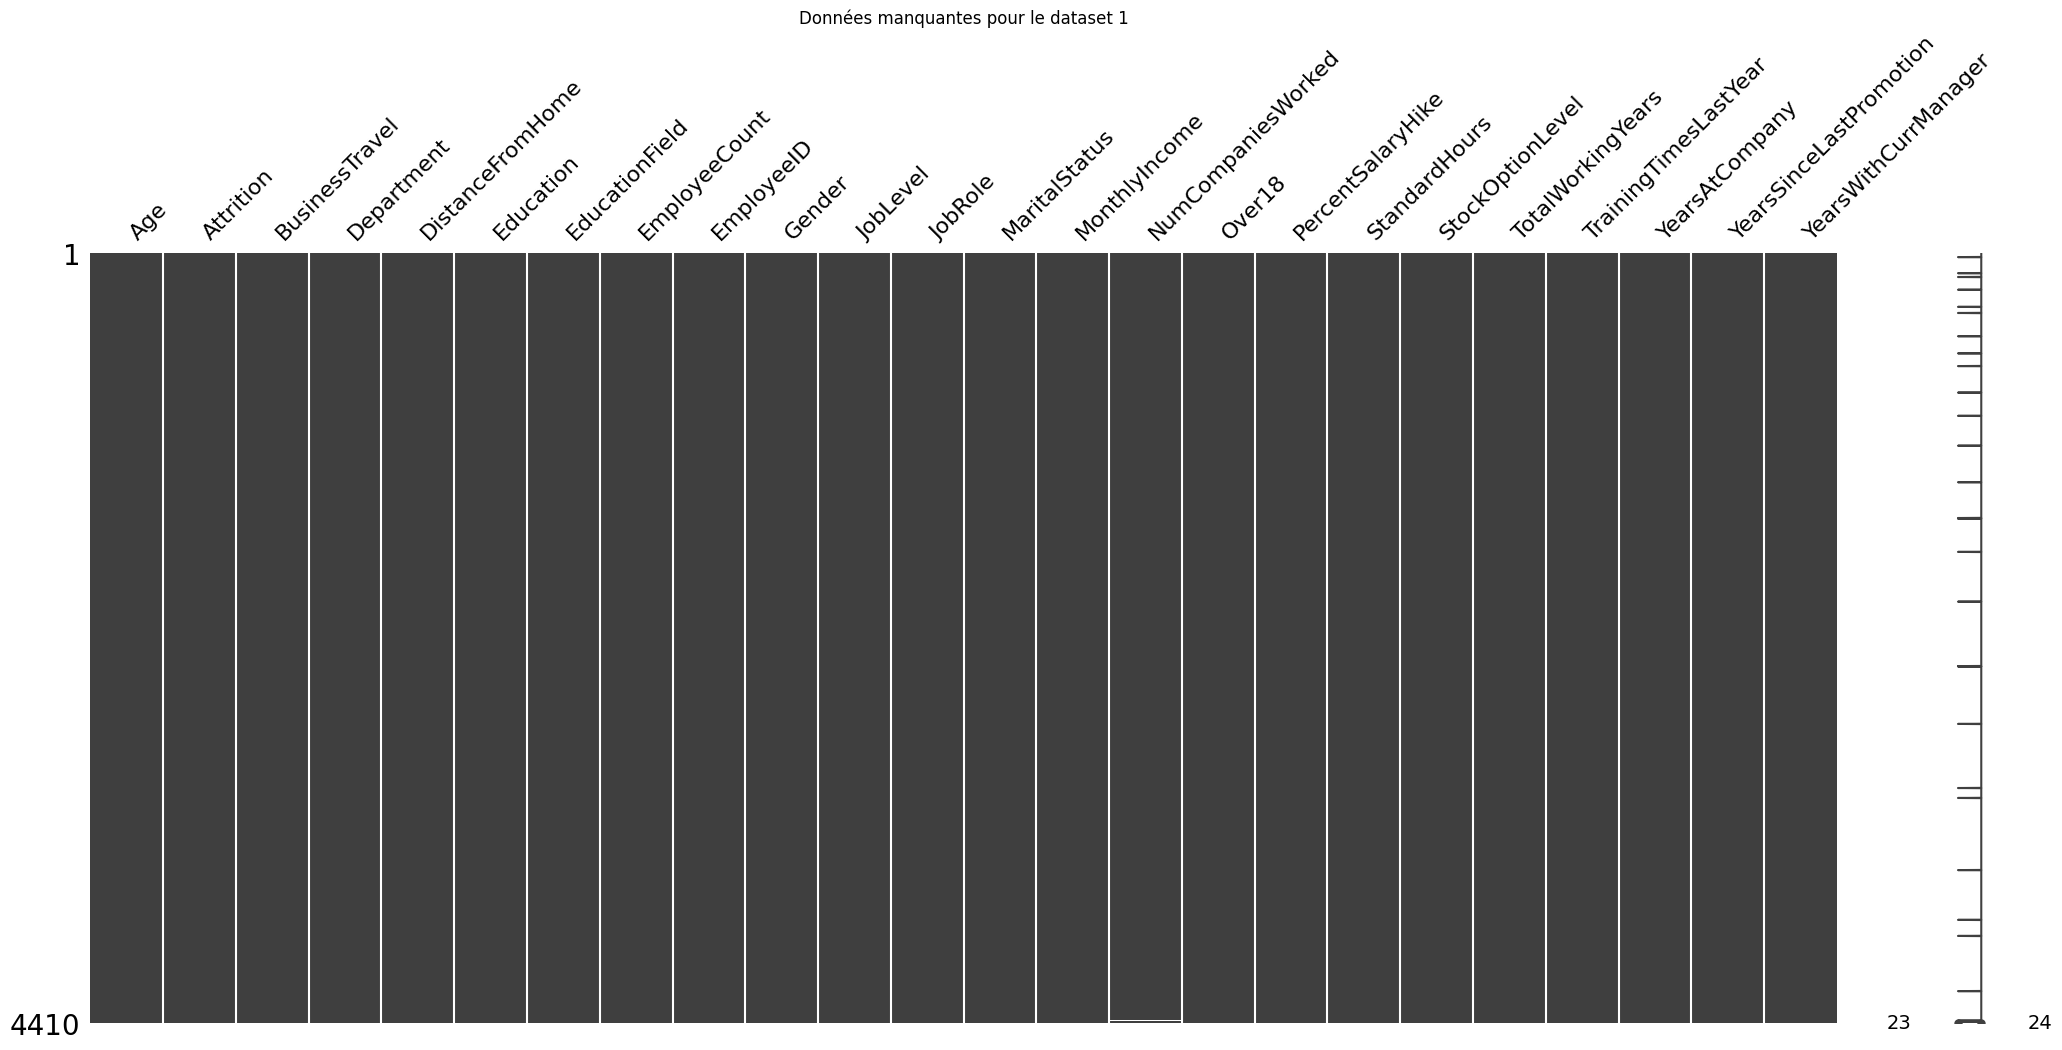

Nombre de valeurs manquantes avant imputation pour le dataset 1:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
--------------------------------------------------
Visualisation des données manquantes après imputation pour le dataset 1:


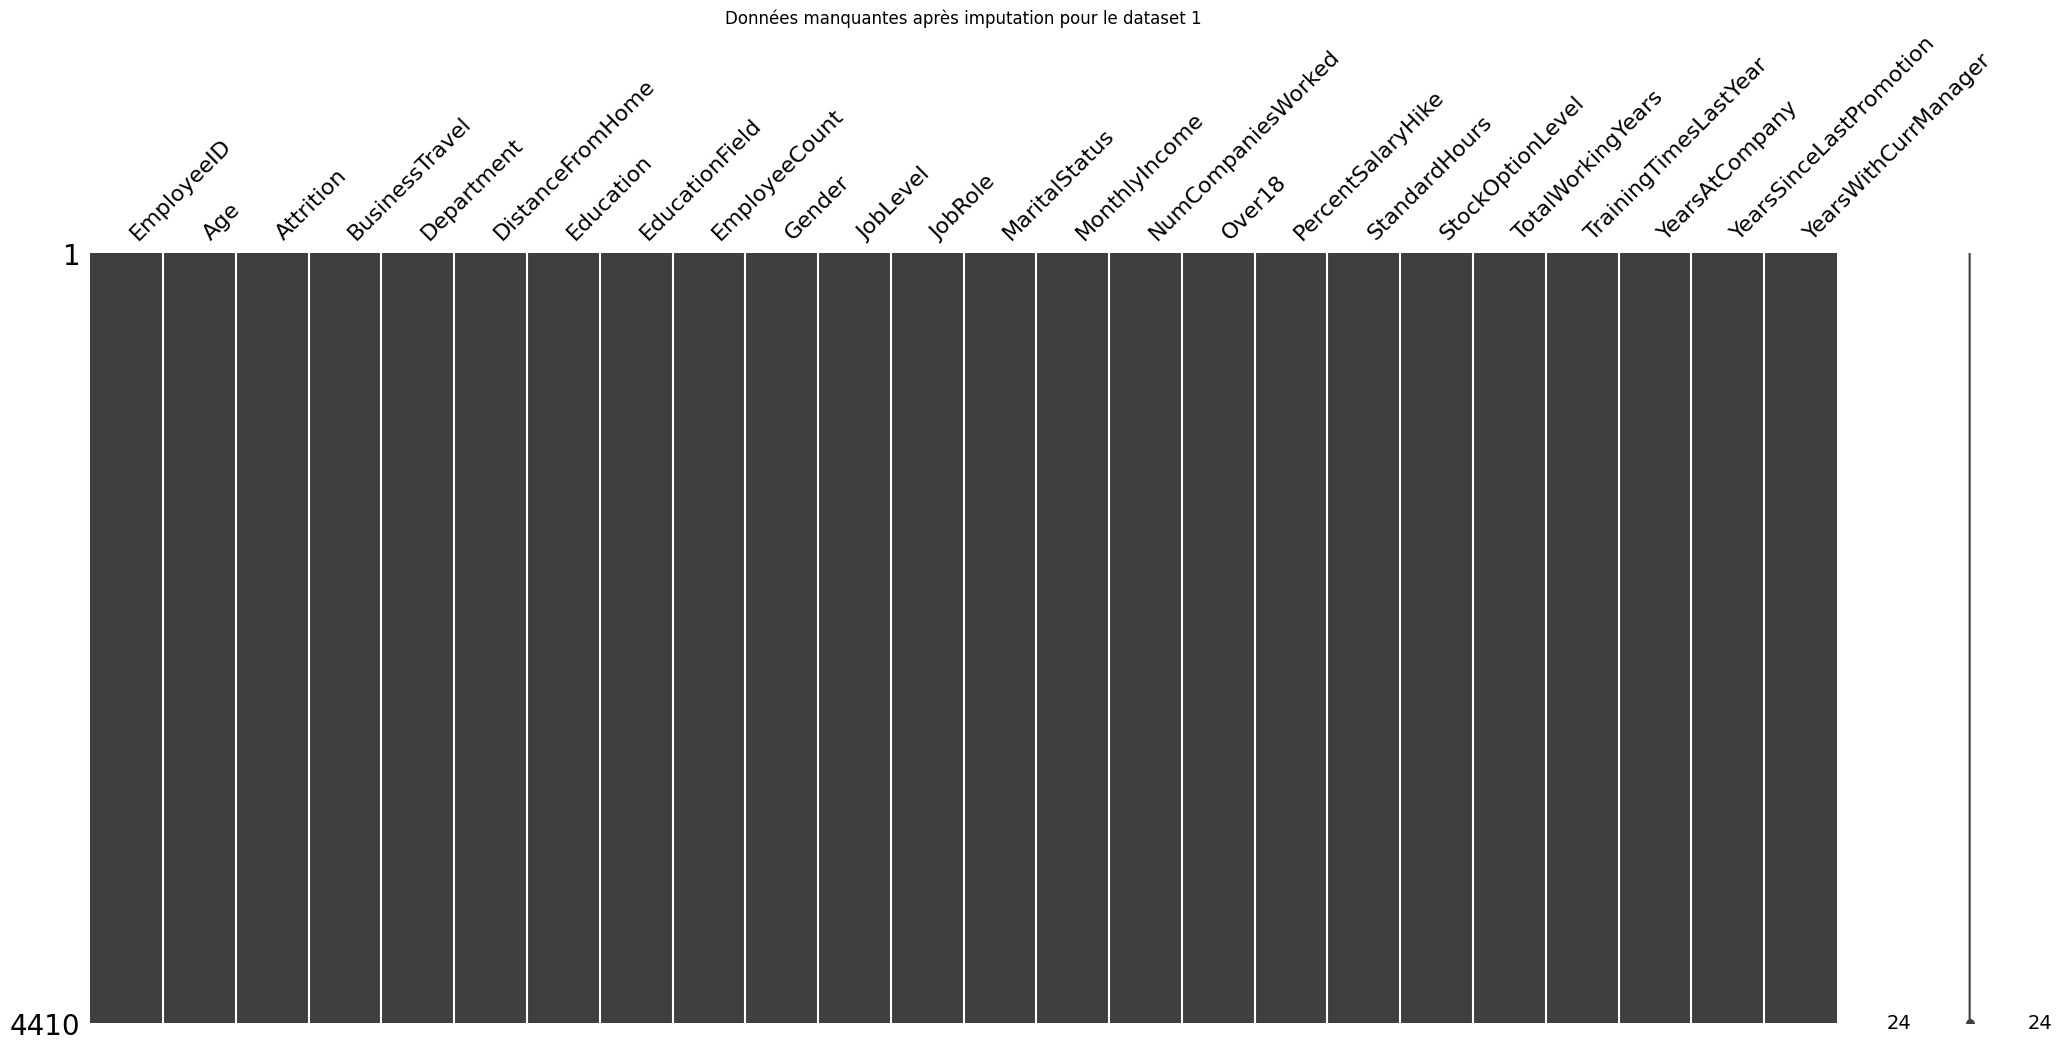

Nombre de valeurs manquantes après imputation pour le dataset 1:
EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64
--------------------------------------------------
'EmployeeID' déplacée en première position pour le dataset 2.
Visualisation des données manquantes pour le dataset 2:


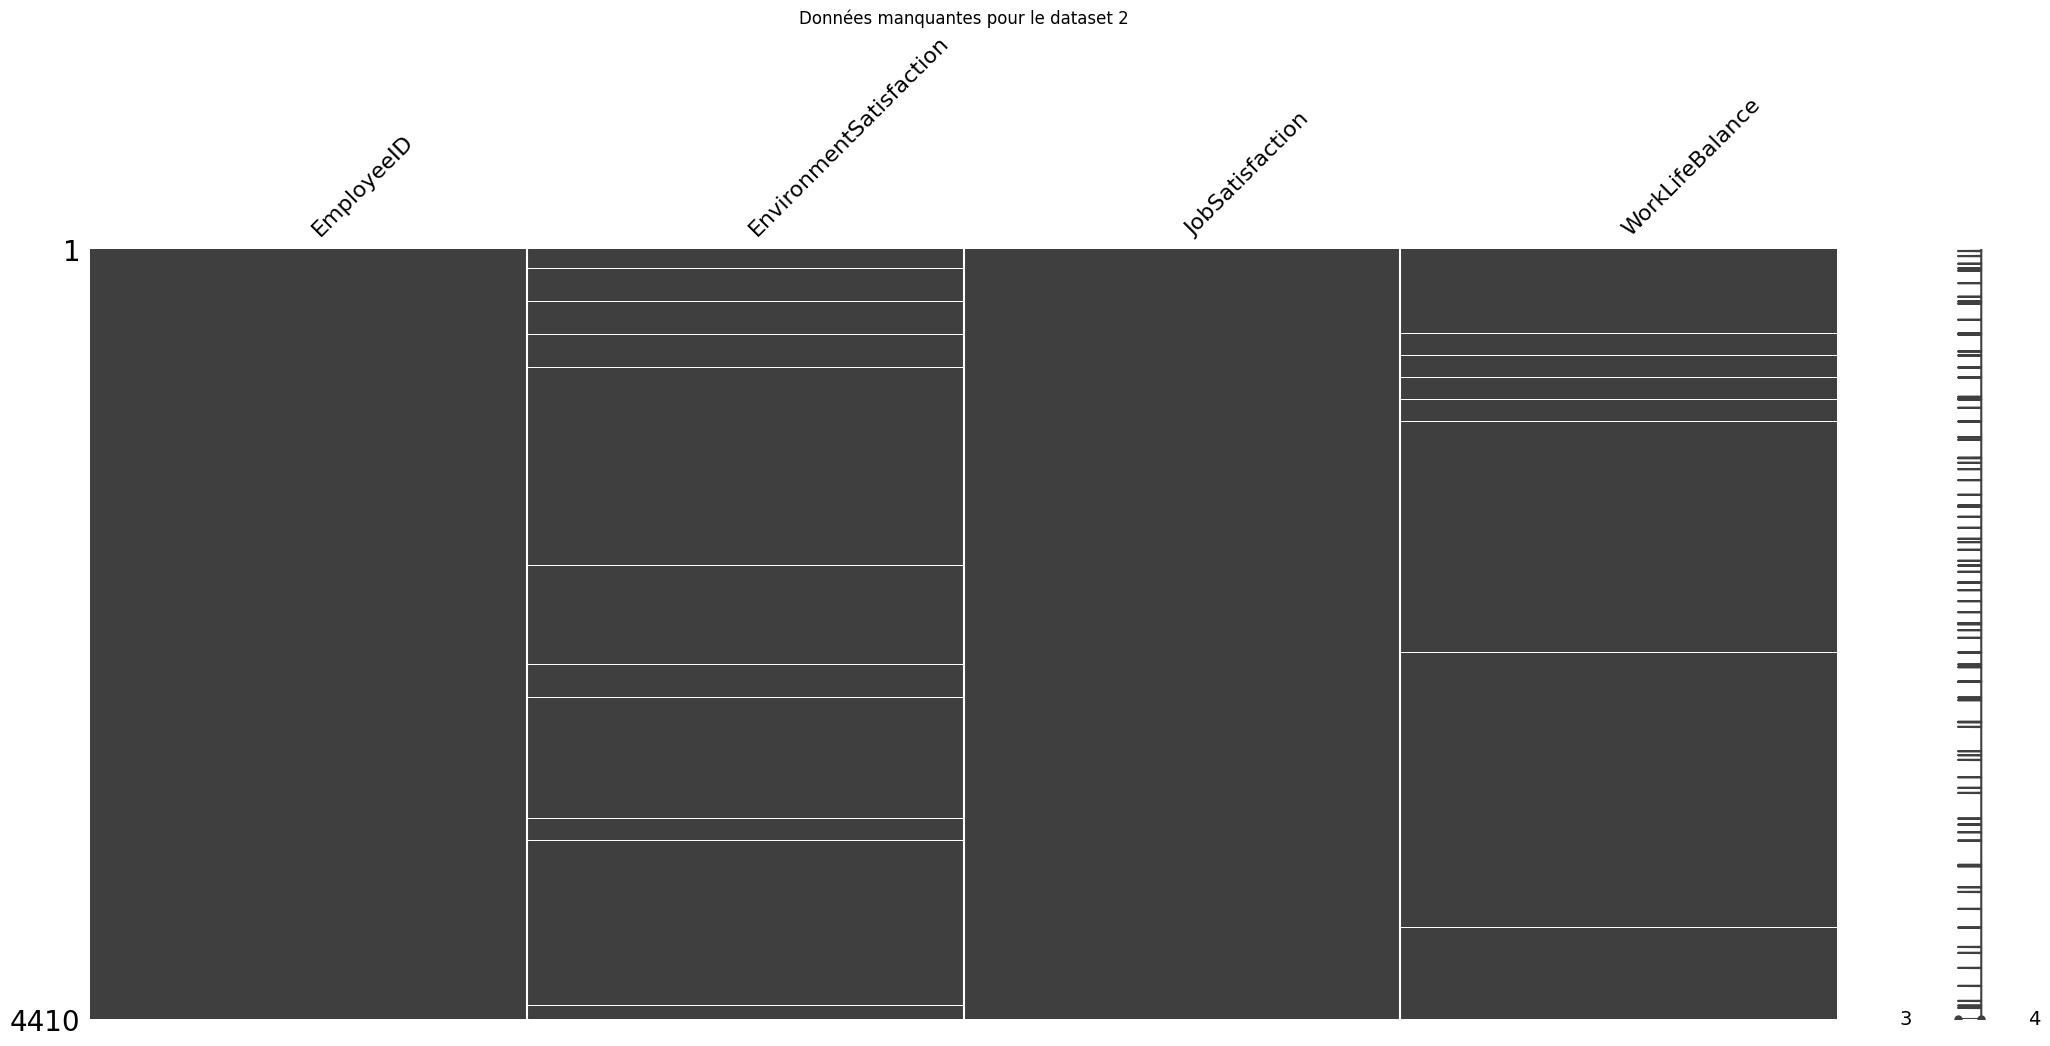

Nombre de valeurs manquantes avant imputation pour le dataset 2:
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
--------------------------------------------------
Visualisation des données manquantes après imputation pour le dataset 2:


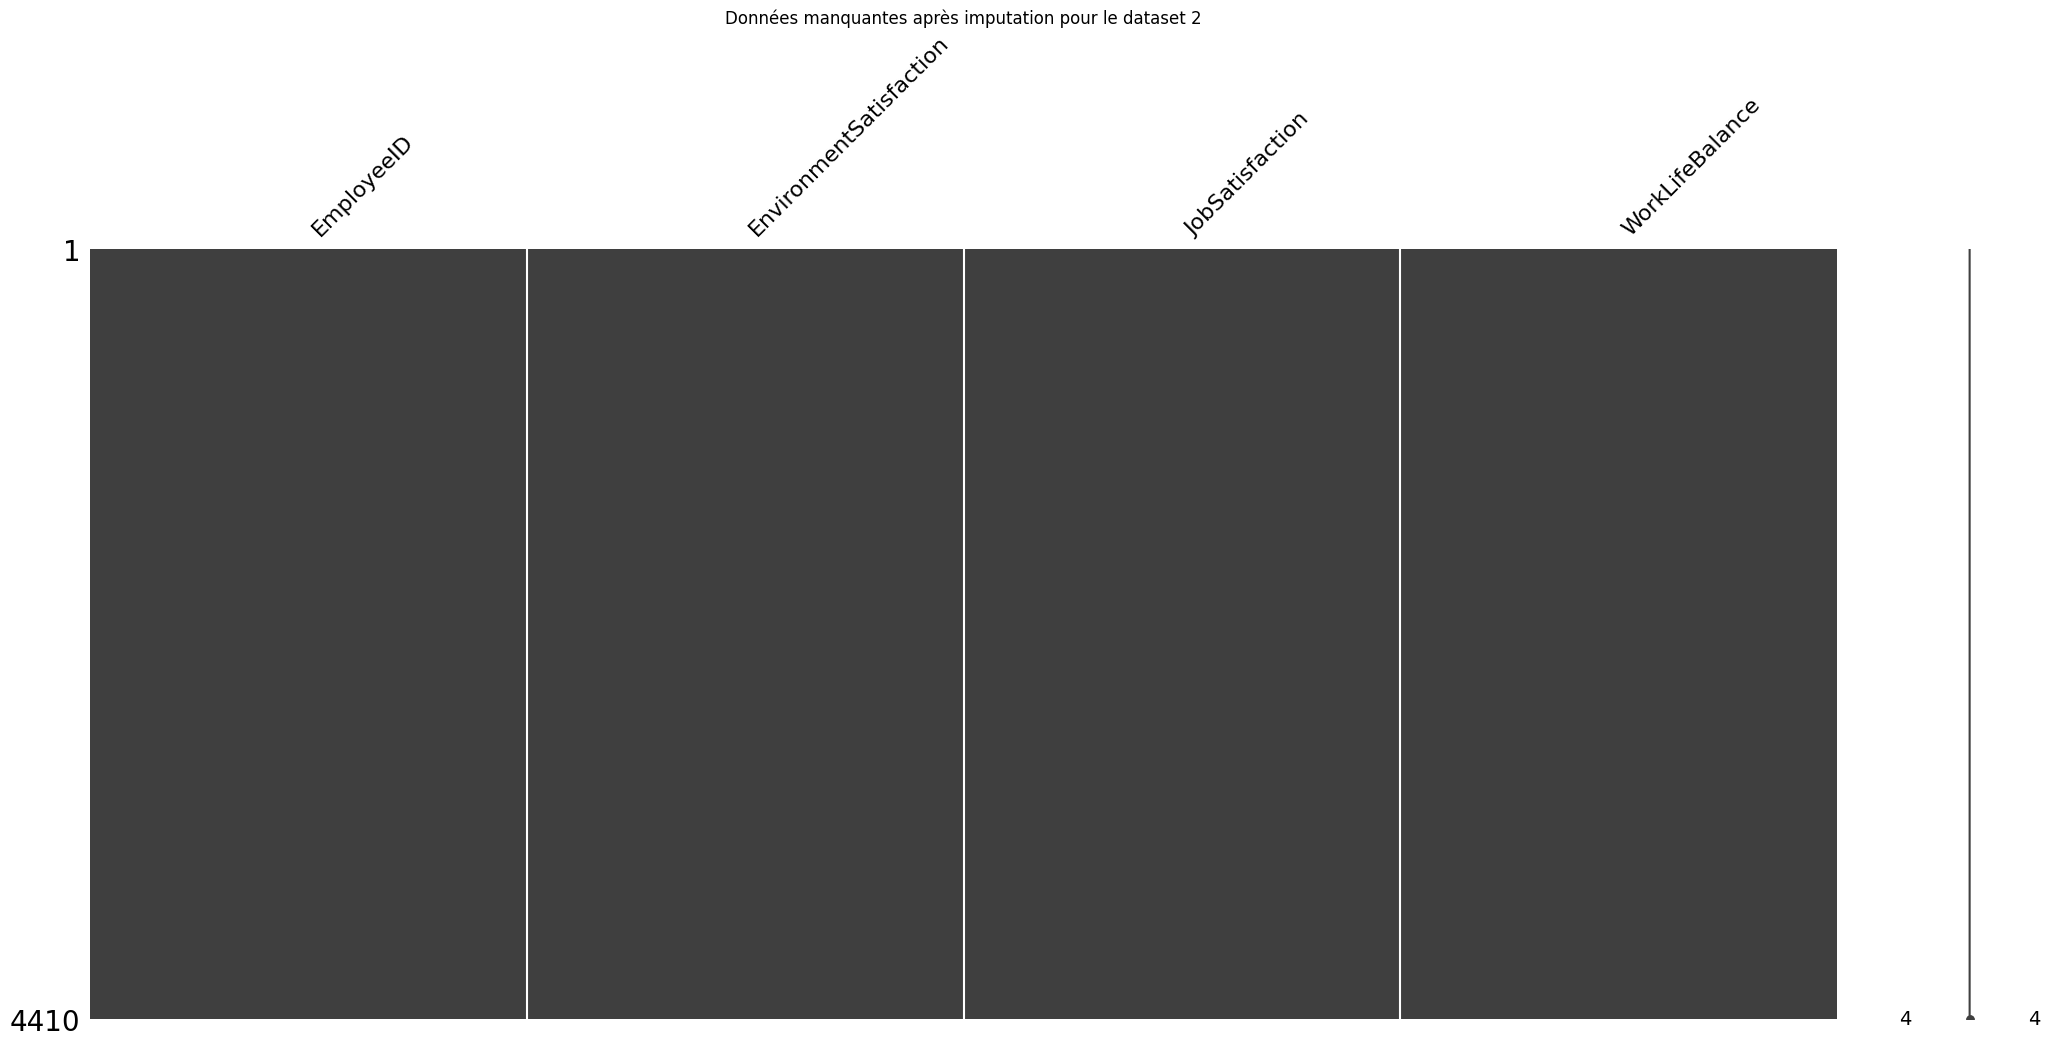

Nombre de valeurs manquantes après imputation pour le dataset 2:
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64
--------------------------------------------------
'EmployeeID' déplacée en première position pour le dataset 3.
Visualisation des données manquantes pour le dataset 3:


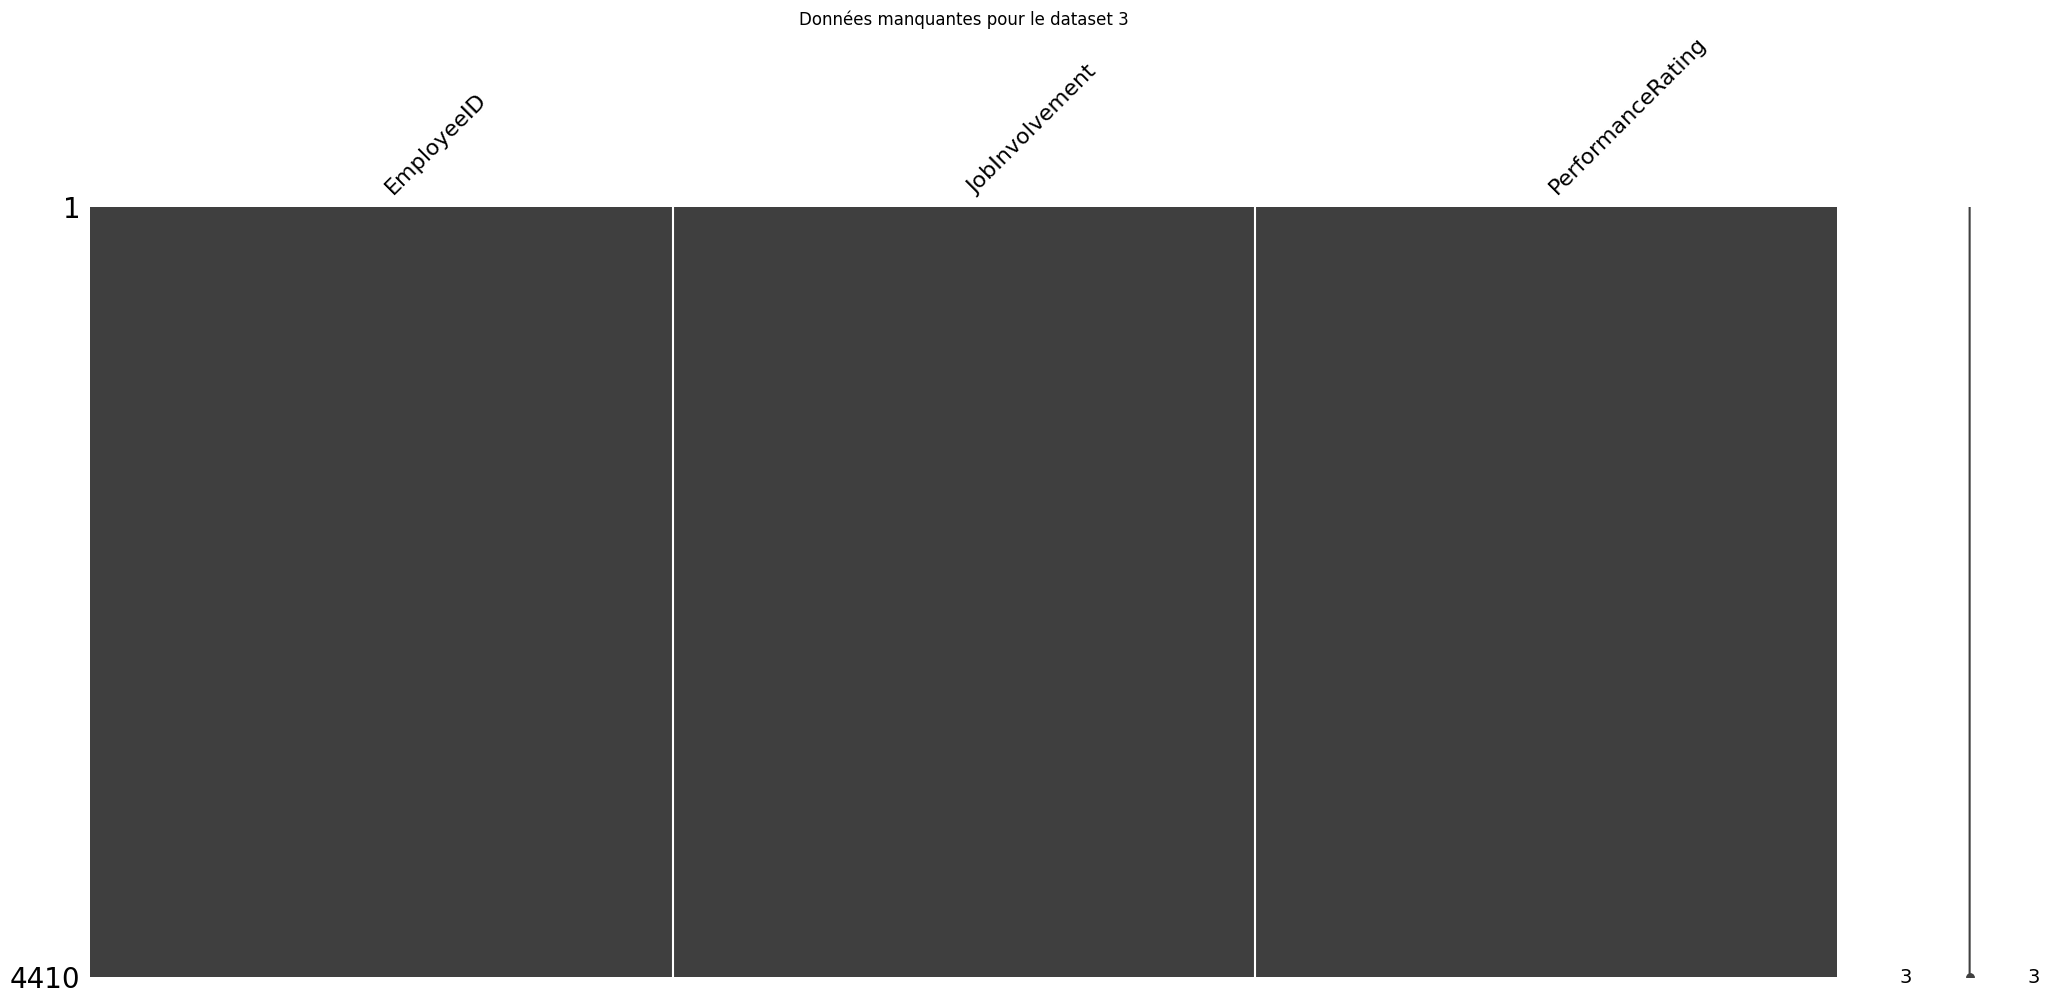

Nombre de valeurs manquantes avant imputation pour le dataset 3:
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
--------------------------------------------------
Visualisation des données manquantes après imputation pour le dataset 3:


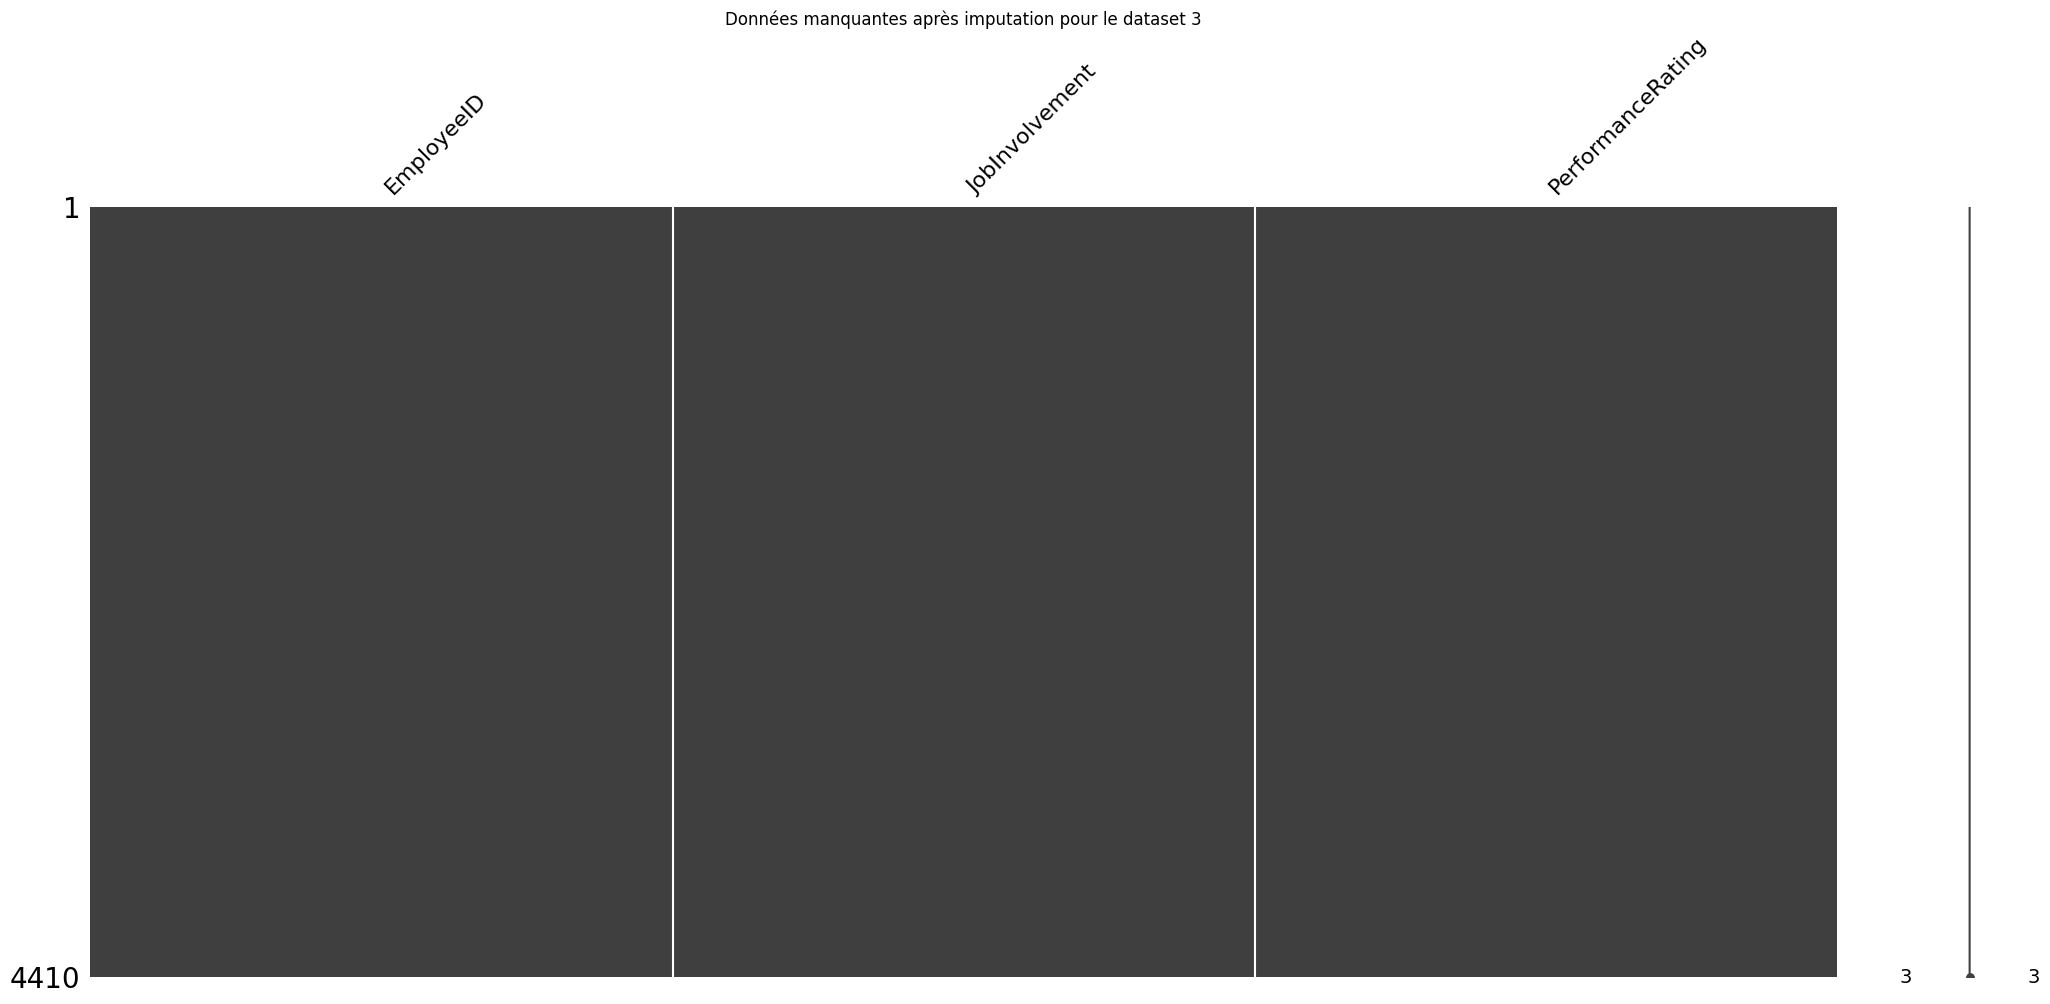

Nombre de valeurs manquantes après imputation pour le dataset 3:
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
--------------------------------------------------
'EmployeeID' déplacée en première position pour le dataset 4.
Visualisation des données manquantes pour le dataset 4:


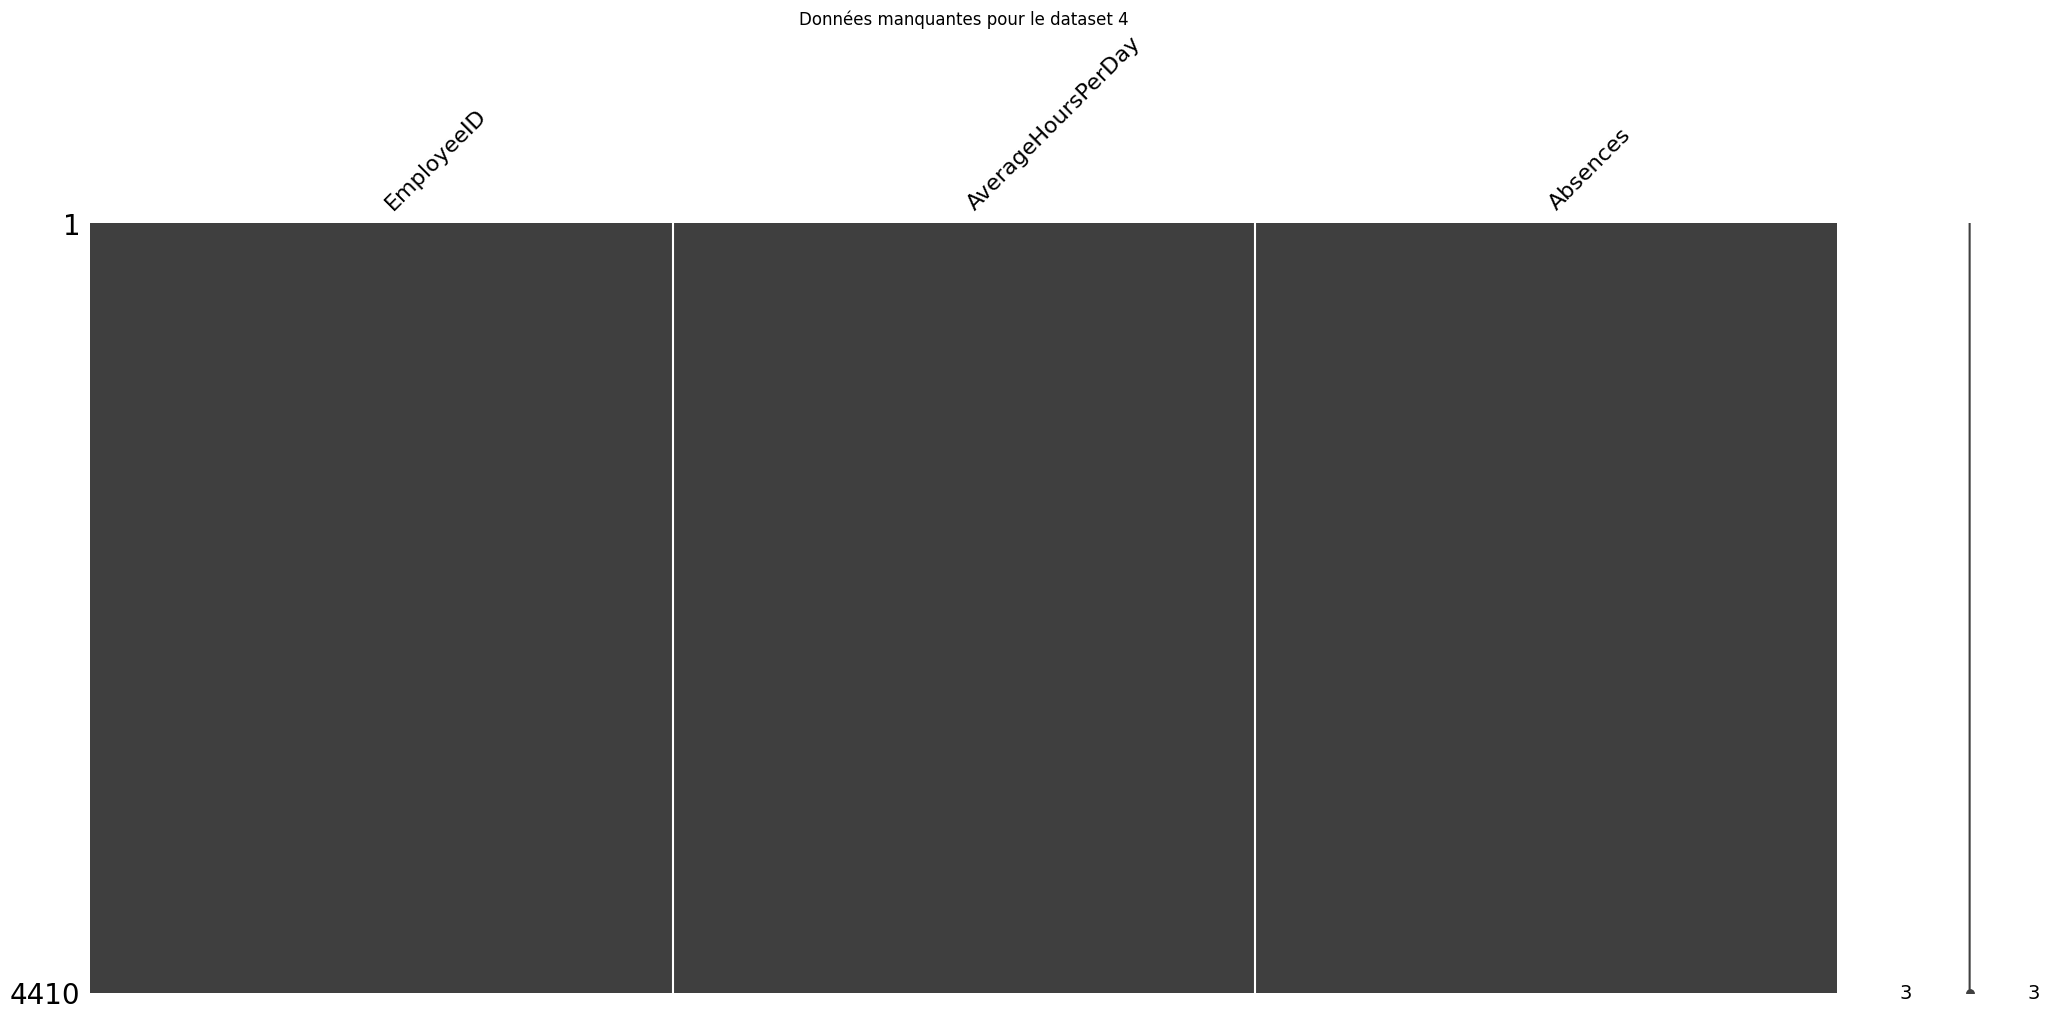

Nombre de valeurs manquantes avant imputation pour le dataset 4:
EmployeeID            0
AverageHoursPerDay    0
Absences              0
dtype: int64
--------------------------------------------------
Visualisation des données manquantes après imputation pour le dataset 4:


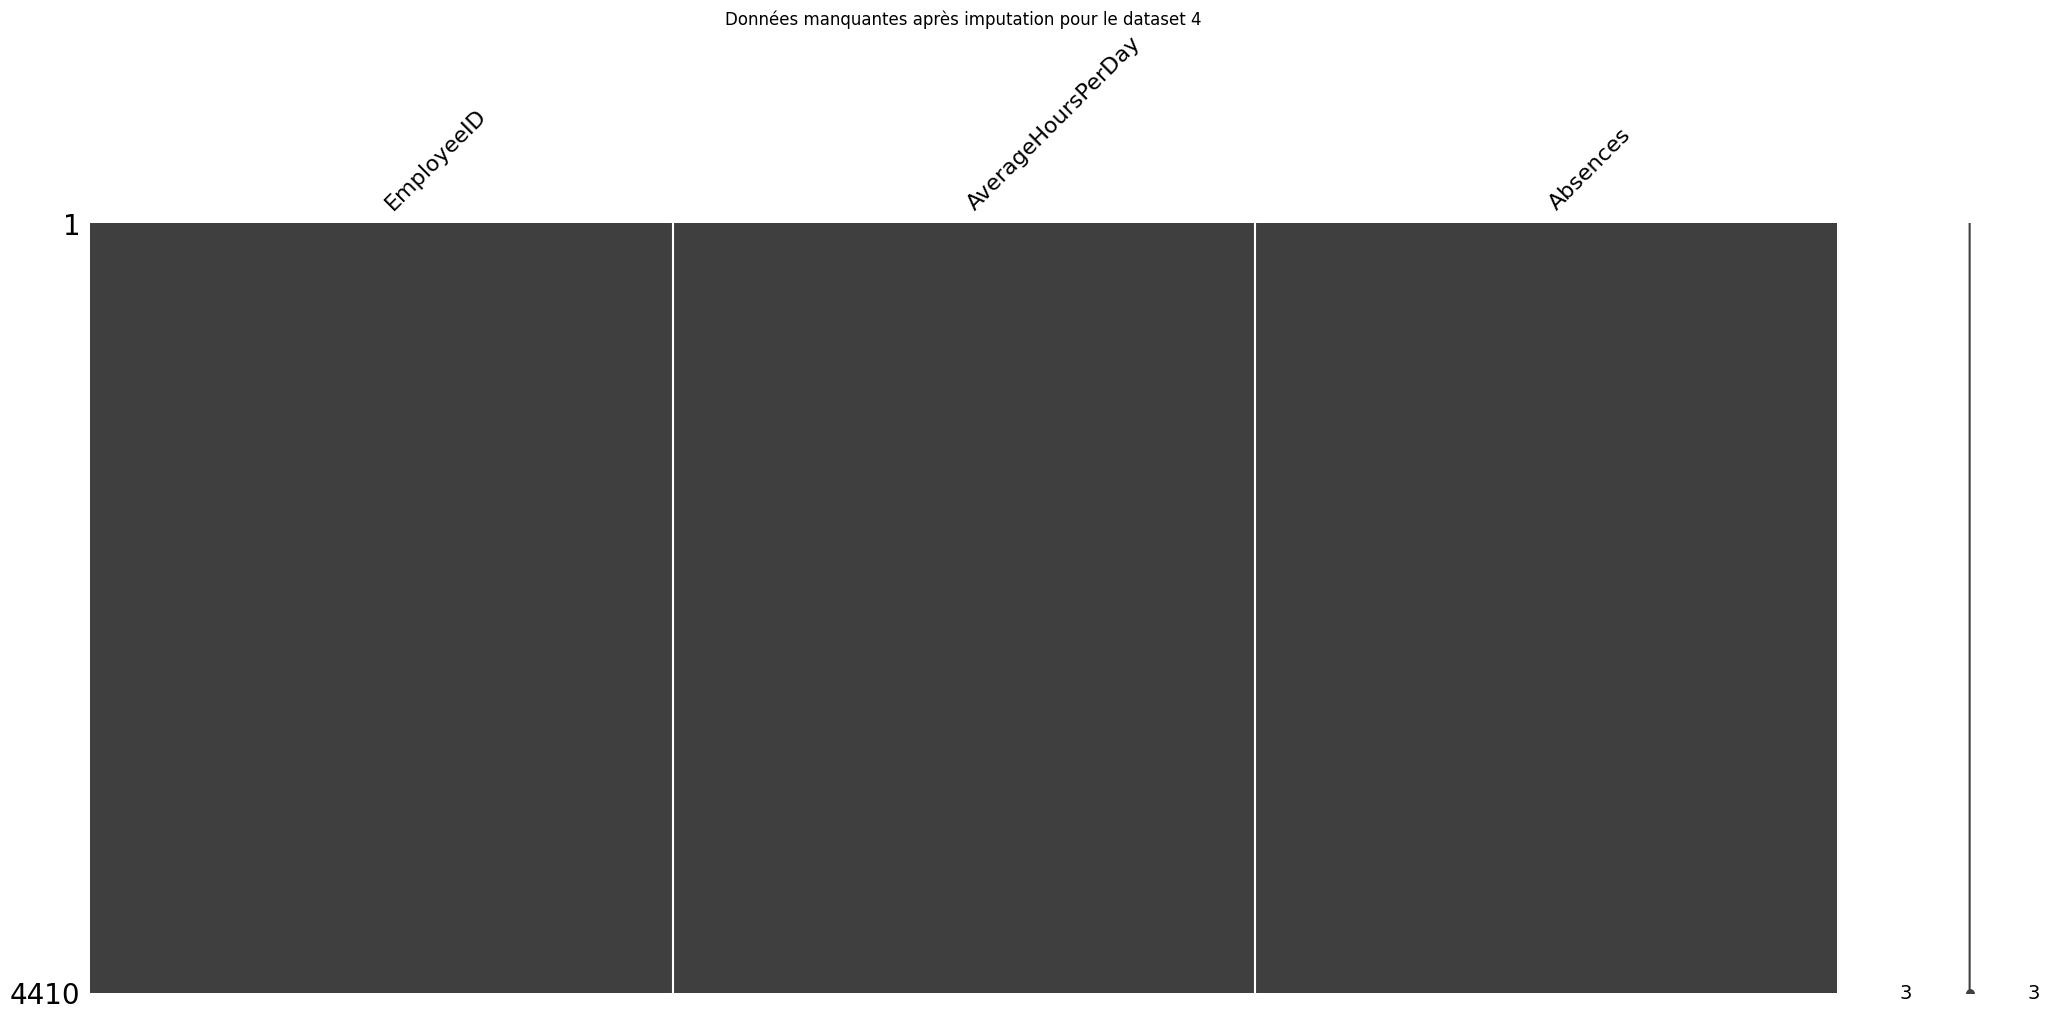

Nombre de valeurs manquantes après imputation pour le dataset 4:
EmployeeID            0
AverageHoursPerDay    0
Absences              0
dtype: int64
--------------------------------------------------


In [ ]:
# Liste des datasets à traiter
datasets = [general_data, employee_survey_data, manager_survey_data, attendance]

# Création de copies des datasets pour la complétion
datasets_copies = [data.copy() for data in datasets]

# Imputation et traitement des copies
for i, data in enumerate(datasets_copies, start=1):
    if 'EmployeeID' in data.columns:
        # Déplacement 'EmployeeID' en première position
        cols = ['EmployeeID'] + [col for col in data.columns if col != 'EmployeeID']
        datasets_copies[i-1] = data[cols]
        print(f"'EmployeeID' déplacée en première position pour le dataset {i}.")
    else:
        print(f"Colonne 'EmployeeID' non trouvée dans le dataset {i}.")

    #++++++++++++++++++++++++++++++++++++++++++ Visualisation des données manquantes avant imputation +++++++++++++++++++++++++++++++++
    print(f"Visualisation des données manquantes pour le dataset {i}:")
    msno.matrix(data)
    plt.title(f"Données manquantes pour le dataset {i}")
    plt.show()

    # Afficher le nombre de valeurs manquantes
    print(f"Nombre de valeurs manquantes avant imputation pour le dataset {i}:")
    print(data.isnull().sum())
    print("-" * 50)

    #+++++++++++++++++++++++++++++++++++++ Imputation des valeurs manquantes ++++++++++++++++++++++++++++++++++++++
    # Pour les colonnes numériques, imputation par la médiane
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    datasets_copies[i-1][numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

    # Pour les colonnes catégorielles, imputation par la mode
    categorical_columns = data.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        mode_value = data[column].mode()
        if not mode_value.empty:
            datasets_copies[i-1][column] = data[column].fillna(mode_value.iloc[0])
        else:
            # Si la mode est vide (aucune valeur disponible), impute avec une valeur par défaut (par exemple, "Unknown")
            datasets_copies[i-1][column] = data[column].fillna("Unknown")

    #+++++++++++++++++++++ Visualisation des données manquantes après imputation +++++++++++++++++++++++++
    print(f"Visualisation des données manquantes après imputation pour le dataset {i}:")
    msno.matrix(datasets_copies[i-1])
    plt.title(f"Données manquantes après imputation pour le dataset {i}")
    plt.show()

    # Vérifier qu'il n'y a plus de valeurs manquantes
    print(f"Nombre de valeurs manquantes après imputation pour le dataset {i}:")
    print(datasets_copies[i-1].isnull().sum())
    print("-" * 50)

Les graphiques précédents montrent les valeurs manquantes présentes dans les colonnes ainsi que le nombre précis de valeurs manquantes dans un tableau pour chaque dataset. Ensuite, la même chose a été effectuée après le remplaçement par la médiane des valeurs manquantes, afin de vérifier qu'il n'en manque plus.

### <u>**Suppression des doublons**</u>

Nombre de lignes avant suppression des doublons pour le dataset 1 : 4410
Nombre de lignes après suppression des doublons pour le dataset 1 : 4410
--------------------------------------------------


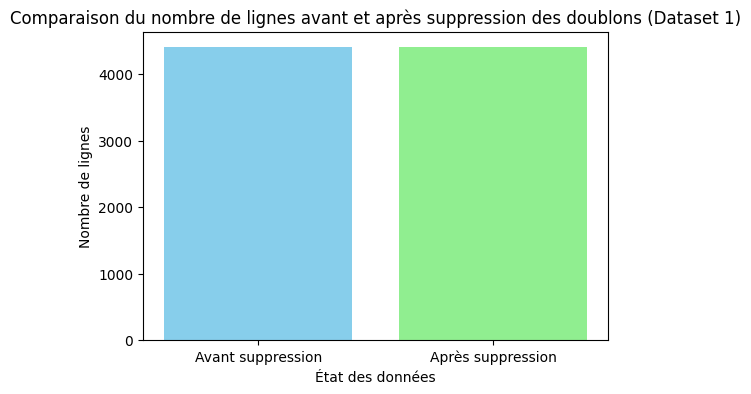

Nombre de lignes avant suppression des doublons pour le dataset 2 : 4410
Nombre de lignes après suppression des doublons pour le dataset 2 : 4410
--------------------------------------------------


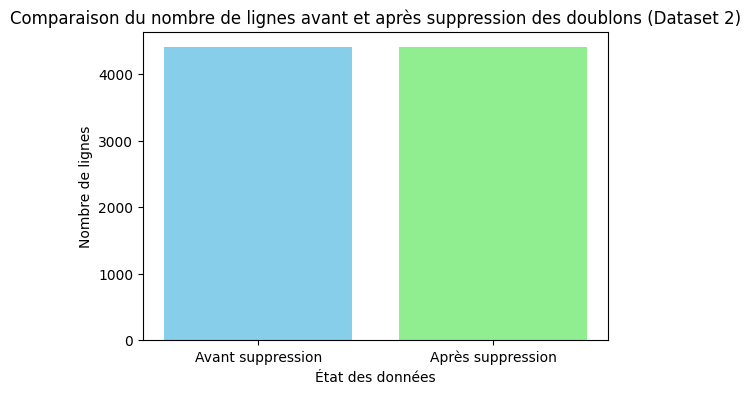

Nombre de lignes avant suppression des doublons pour le dataset 3 : 4410
Nombre de lignes après suppression des doublons pour le dataset 3 : 4410
--------------------------------------------------


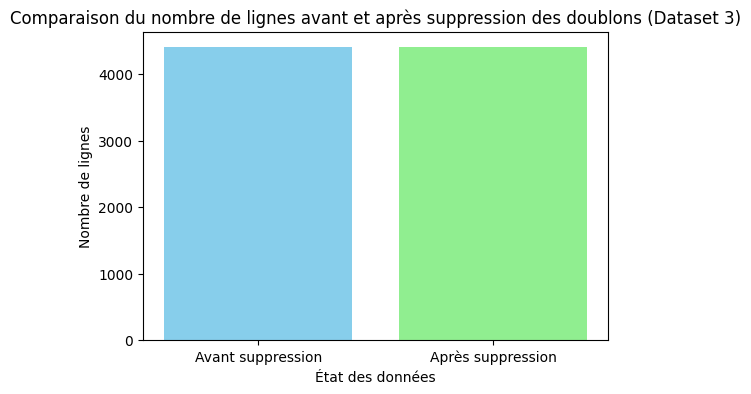

Nombre de lignes avant suppression des doublons pour le dataset 4 : 4410
Nombre de lignes après suppression des doublons pour le dataset 4 : 4410
--------------------------------------------------


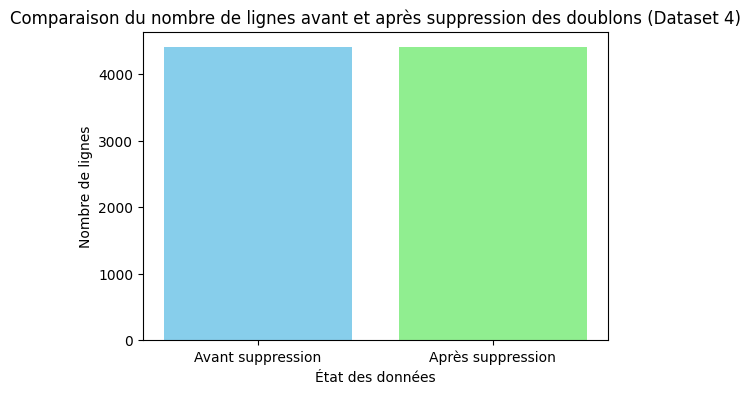

In [ ]:
# Parcours de tous les datasets dans 'datasets_copies'
for i, data in enumerate(datasets_copies, start=1):
    # Suppression des doublons dans chaque dataset
    initial_count = len(datasets_copies[i-1])
    datasets_copies[i-1] = datasets_copies[i-1].drop_duplicates()
    final_count = len(datasets_copies[i-1])

    # Affichage des informations pour chaque dataset
    print(f"Nombre de lignes avant suppression des doublons pour le dataset {i} : {initial_count}")
    print(f"Nombre de lignes après suppression des doublons pour le dataset {i} : {final_count}")
    print("-" * 50)

    # Visualisation des résultats pour chaque dataset
    labels = ['Avant suppression', 'Après suppression']
    counts = [initial_count, final_count]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, counts, color=['skyblue', 'lightgreen'])
    plt.title(f'Comparaison du nombre de lignes avant et après suppression des doublons (Dataset {i})')
    plt.ylabel('Nombre de lignes')
    plt.xlabel('État des données')
    plt.xticks(rotation=0)
    plt.show()


On peut voir grâce aux graphiques précédents qu'aucun dataset ne contient de valeurs en doublon, chaque enregistrement étant donc unique. Cela garantit l'intégrité des données et évite tout biais lors de l'entraînement des modèles.

### <u>**Gestion des valeurs aberrantes**</u>

Dataset 4 - Nombre total de valeurs aberrantes remplacées par la médiane : {'Dataset 1': 2331, 'Dataset 2': 0, 'Dataset 3': 678, 'Dataset 4': 343}


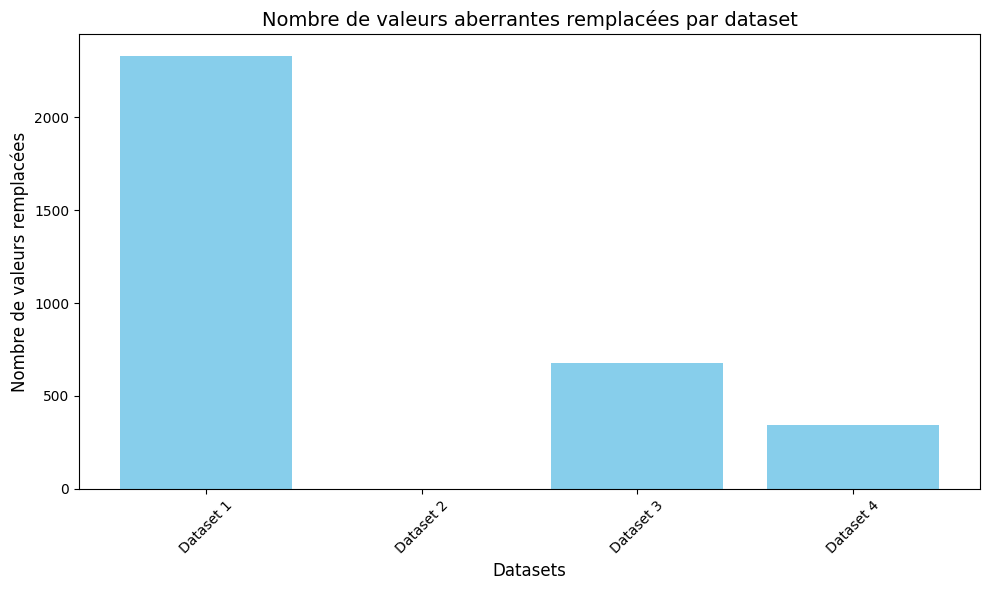

In [ ]:
# Fonction pour traiter les valeurs aberrantes et compter le nombre remplacé
def handle_outliers(data, dataset_name, results):
    # Sélection des colonnes numériques (en excluant 'Attrition')
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_columns = [col for col in numerical_columns if col != 'Attrition']

    if numerical_columns:
        # Calcul des bornes avec IQR
        Q1 = data[numerical_columns].quantile(0.25)
        Q3 = data[numerical_columns].quantile(0.75)
        IQR = Q3 - Q1
        factor = 1.5

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        total_replaced = 0  # Compteur des valeurs remplacées

        # Remplaçement des valeurs aberrantes par la médiane
        for col in numerical_columns:
            median = data[col].median()
            before_count = ((data[col] < lower_bound[col]) | (data[col] > upper_bound[col])).sum()
            data[col] = data[col].mask((data[col] < lower_bound[col]) | (data[col] > upper_bound[col]), median)
            total_replaced += before_count

        # Ajout du total au dictionnaire des résultats
        results[dataset_name] = total_replaced

    else:
        results[dataset_name] = 0  # Aucune valeur aberrante

    return data

# Dictionnaire pour stocker les résultats
replaced_outliers = {}

# Application du traitement aux datasets
for i, data in enumerate(datasets_copies, start=1):
    dataset_name = f"Dataset {i}"
    datasets_copies[i-1] = handle_outliers(data, dataset_name, replaced_outliers)

print(f"{dataset_name} - Nombre total de valeurs aberrantes remplacées par la médiane : {replaced_outliers}")

# Génération du graphique
plt.figure(figsize=(10, 6))
plt.bar(replaced_outliers.keys(), replaced_outliers.values(), color='skyblue')
plt.title("Nombre de valeurs aberrantes remplacées par dataset", fontsize=14)
plt.xlabel("Datasets", fontsize=12)
plt.ylabel("Nombre de valeurs remplacées", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nous avons remplacé les valeurs aberrantes par la médiane, ce qui permet d'améliorer la qualité des données et d'éviter que ces points extrêmes biaisent les analyses ou les performances des modèles. Le graphique montre que 2331 valeurs ont été remplacées pour le dataset1, 0 pour le dataset2, 678 pour le dataset3 et 343 pour le dataset4.

### <u>**Fusion des datasets**</u>
Les datasets ont été fusionnés sur la colonne EmployeeID pour obtenir un dataset consolidé.
Nous avons effectué des vérifications pour s'assurer de l'alignement et de la complétude des données après fusion.


In [ ]:
# Fusion des copies modifiées
general_data_copy = datasets_copies[0]
employee_survey_data_copy = datasets_copies[1]
manager_survey_data_copy = datasets_copies[2]
attendance_copy = datasets_copies[3]

# Fusion des datasets complétés
data_merged = general_data_copy.merge(manager_survey_data_copy, on='EmployeeID', how='outer') \
                               .merge(employee_survey_data_copy, on='EmployeeID', how='outer') \
                               .merge(attendance_copy, on='EmployeeID', how='outer')

print(data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Nous développons ici une fonction destinée à analyser les données les plus influentes, dans le but d'identifier des pistes de solutions pertinentes pour l'entreprise.

In [ ]:
def plot_kde(data_merged):
    # Création de la figure et de sous-graphes
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 lignes et 2 colonnes de sous-graphes

    # Graphique pour AverageHoursPerDay
    sns.kdeplot(data=data_merged, x='AverageHoursPerDay', hue='Attrition', fill=True, ax=axes[0, 0], palette="Set2", common_norm=False)
    axes[0, 0].set_title('Average Hours Per Day vs Attrition')
    axes[0, 0].set_xlim(data_merged['AverageHoursPerDay'].min(), data_merged['AverageHoursPerDay'].max())  # Ajuste les valeurs x

    # Graphique pour MonthlyIncome
    sns.kdeplot(data=data_merged, x='MonthlyIncome', hue='Attrition', fill=True, ax=axes[0, 1], palette="Set2", common_norm=False)
    axes[0, 1].set_title('Monthly Income vs Attrition')
    axes[0, 1].set_xlim(0, data_merged['MonthlyIncome'].quantile(0.95))  # Limite la plage des x à 95e percentile

    # Graphique pour TotalWorkingYears
    sns.kdeplot(data=data_merged, x='TotalWorkingYears', hue='Attrition', fill=True, ax=axes[1, 0], palette="Set2", common_norm=False)
    axes[1, 0].set_title('TotalWorkingYears vs Attrition')
    axes[1, 0].set_xlim(data_merged['TotalWorkingYears'].min(), data_merged['TotalWorkingYears'].max())  # Ajuste les valeurs x

    # Graphique pour YearsAtCompany
    sns.kdeplot(data=data_merged, x='YearsAtCompany', hue='Attrition', fill=True, ax=axes[1, 1], palette="Set2", common_norm=False)
    axes[1, 1].set_title('YearsAtCompany vs Attrition')
    axes[1, 1].set_xlim(data_merged['YearsAtCompany'].min(), data_merged['YearsAtCompany'].max())  # Ajuste les valeurs x

    # Graphique pour DistanceFromHome
    sns.kdeplot(data=data_merged, x='DistanceFromHome', hue='Attrition', fill=True, ax=axes[2, 0], palette="Set2", common_norm=False)
    axes[2, 0].set_title('Distance From Home vs Attrition')
    axes[2, 0].set_xlim(data_merged['DistanceFromHome'].min(), data_merged['DistanceFromHome'].max())  # Ajuste les valeurs x

    # Suppression de l'axe vide (2,1) qui n'est pas nécessaire
    axes[2, 1].axis('off')

    # Afficher les graphiques
    plt.tight_layout()
    plt.show()


On peut alors voir qu'il y a le même nombre de lignes pour chaque colonne.

Création d'une fonction plot_histograms(), cette fonction aura pour objectif d'afficher des histogrammes que nous afficherons plus tard dans notre livrable.

In [46]:
def plot_histograms(data, numerical_features, exclude_feature='EmployeeID', bins=20, figsize=(14, 5), num_cols=4):
    # Filtrer les colonnes numériques
    filtered_features = [feature for feature in numerical_features if feature != exclude_feature]

    num_features = len(filtered_features)
    num_rows = int(np.ceil(num_features / num_cols))

    # Création des subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    # Liste de couleurs pour alterner les histogrammes
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'khaki']

    # Générer les histogrammes pour chaque feature
    for i, feature in enumerate(filtered_features):
        axes[i].hist(data[feature].dropna(), bins=bins, color=colors[i % len(colors)], edgecolor='black')
        axes[i].set_title(f'Histogramme - {feature}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel(feature, fontsize=9)
        axes[i].set_ylabel('Fréquence', fontsize=9)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter des lignes de grille pour l'axe Y

    # Supprimer les axes inutilisés
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

    # Ajustement des espacements pour une meilleure visibilité
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.8, wspace=0.4)  # Plus d'espacement vertical et horizontal

    # Afficher les plots
    plt.show()

### <u>**Ethique**</u>

Du point de vue éthique de notre étude, nous avons décidé de supprimer les colonnes concernant l'âge et le genre. Nous avons également supprimé les colonnes Over18, EmployeeCount, StandardHours et PerformingRating, car ce sont des variables statiques qui pourraient diminuer la performance de nos prédictions.

In [ ]:
# Suppression de certaines colonnes
data_merged = data_merged.drop(['Over18', 'EmployeeCount', 'StandardHours', 'PerformanceRating', 'Gender', 'Age'], axis=1)

### <u>**One-Hot Encoding**</u>

In [ ]:
# Sélection des colonnes catégorielles pour le one-hot encoding
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# One-hot encoding des colonnes catégorielles
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data_merged[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

Les colonnes catégorielles sélectionnées pour le one-hot encoding sont : BusinessTravel, Department, EducationField, JobRole, et MaritalStatus.
Le One-Hot Encoding transforme ces colonnes en variables numériques binaires, facilitant leur utilisation dans les modèles de machine learning.

### <u>**Normalisation des données**</u>

Ici, nous préparons les données pour entraîner nos modèles. On sépare notre target des autres données en la supprimant de X et en la mettant, seule, dans y.

In [ ]:
# Sélection des colonnes numériques pour la normalisation Z-score
numerical_features = data_merged.select_dtypes(include=['number']).columns.tolist()  # Obtenir que les colonnes numériques
numerical_features = [col for col in numerical_features if col not in categorical_features + ['Attrition']]  # Exclure la catégorie correspondant à notre target

# Normalisation Z-score des colonnes numériques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_merged[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Conversion de 'Attrition' en valeurs binaires
data_merged['Attrition'] = data_merged['Attrition'].map({'Yes': 1, 'No': 0})

# Fusion des colonnes encodées et les colonnes normalisées
processed_data = pd.concat([scaled_df, encoded_df], axis=1)
processed_data['Attrition'] = data_merged['Attrition']  # Target

# Séparation des features (X) et de la cible (y)
X = processed_data.drop('Attrition', axis=1)
y = processed_data['Attrition']

# Affichage des formes de X et y
print(X.shape)
print(y.shape)

(4410, 43)
(4410,)


## <u>**D. Division des données**</u>

### <u>**Répartition en ensemble d'entraînement et de test.**</u>

Lorsqu’on construit un modèle de machine learning, nous devons pouvoir évaluer ses performances sur des données qu’il n’a jamais vues auparavant. Cela permet d’estimer sa capacité à généraliser à de nouvelles données.

In [ ]:
# Fixation d'un seed pour avoir les mêmes résultats à chaque essai
np.random.seed(42)
test_size = 0.3

# Séparation des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

Nous allons alors séparer nos données en deux ensembles, dont 70% pour l'entrainement et 30% pour le test.

# <u>**III. Exploration et Visualisation des Données**</u>

 Les visualisations suivantes ont été réalisées pour mieux comprendre la distribution des données et les relations entre les variables :

* **Boxplots** : Visualisation des distributions des variables numériques selon la classe Attrition.  
* **Heatmap** : Matrice de corrélation réalisée pour identifier les relations entre les variables.  
* **Histogrammes** : Analyse de la répartition des variables numériques.



##<u>**A. Boites à moustaches (Boxplots)**</u>

Ces graphiques permettent de comparer les distributions des variables selon les classes (Attrition "Yes" ou "No").

Ce code est utilisé pour visualiser comment différentes caractéristiques (comme le revenu mensuel, les années d'expérience, etc.) sont distribuées en fonction de l'attribut "Attrition" (qui indique si une personne a quitté l'entreprise ou non). Les boxplots permettent de comparer rapidement les distributions de ces caractéristiques entre les employés qui sont partis et ceux qui sont restés.








In [ ]:
# Création des graphiques boxplot pour certaines colonnes
cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager']
plot_rows = 2
plot_cols = 4
fig = make_subplots(rows=plot_rows, cols=plot_cols, subplot_titles=(cols))

col_i = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        for t in px.box(processed_data, x="Attrition", y=cols[col_i]).data:
            fig.add_trace(t, row=i, col=j)

        col_i = col_i + 1

fig.update_layout(height=600, width=1200)
fig.show()


Grâce aux boîtes à moustaches, on peut voir qu'il y a une plus grande corrélation avec les variables : TotalWorkingYears, YearsAtCompany ainsi que YearsWithCurrManager.

##**B. Matrice de corrélation (Heatmap)**</u>

Pour analyser les relations entre les variables numériques, une matrice de corrélation a été générée et visualisée à l’aide d’une heatmap :
* Sélection des variables numériques : Les colonnes numériques pertinentes ont été identifiées parmi les données traitées. La variable cible Attrition a été ajoutée si elle n'était pas déjà incluse.
* Calcul de la matrice de corrélation : La corrélation entre ces variables a été calculée en utilisant la méthode de corrélation.


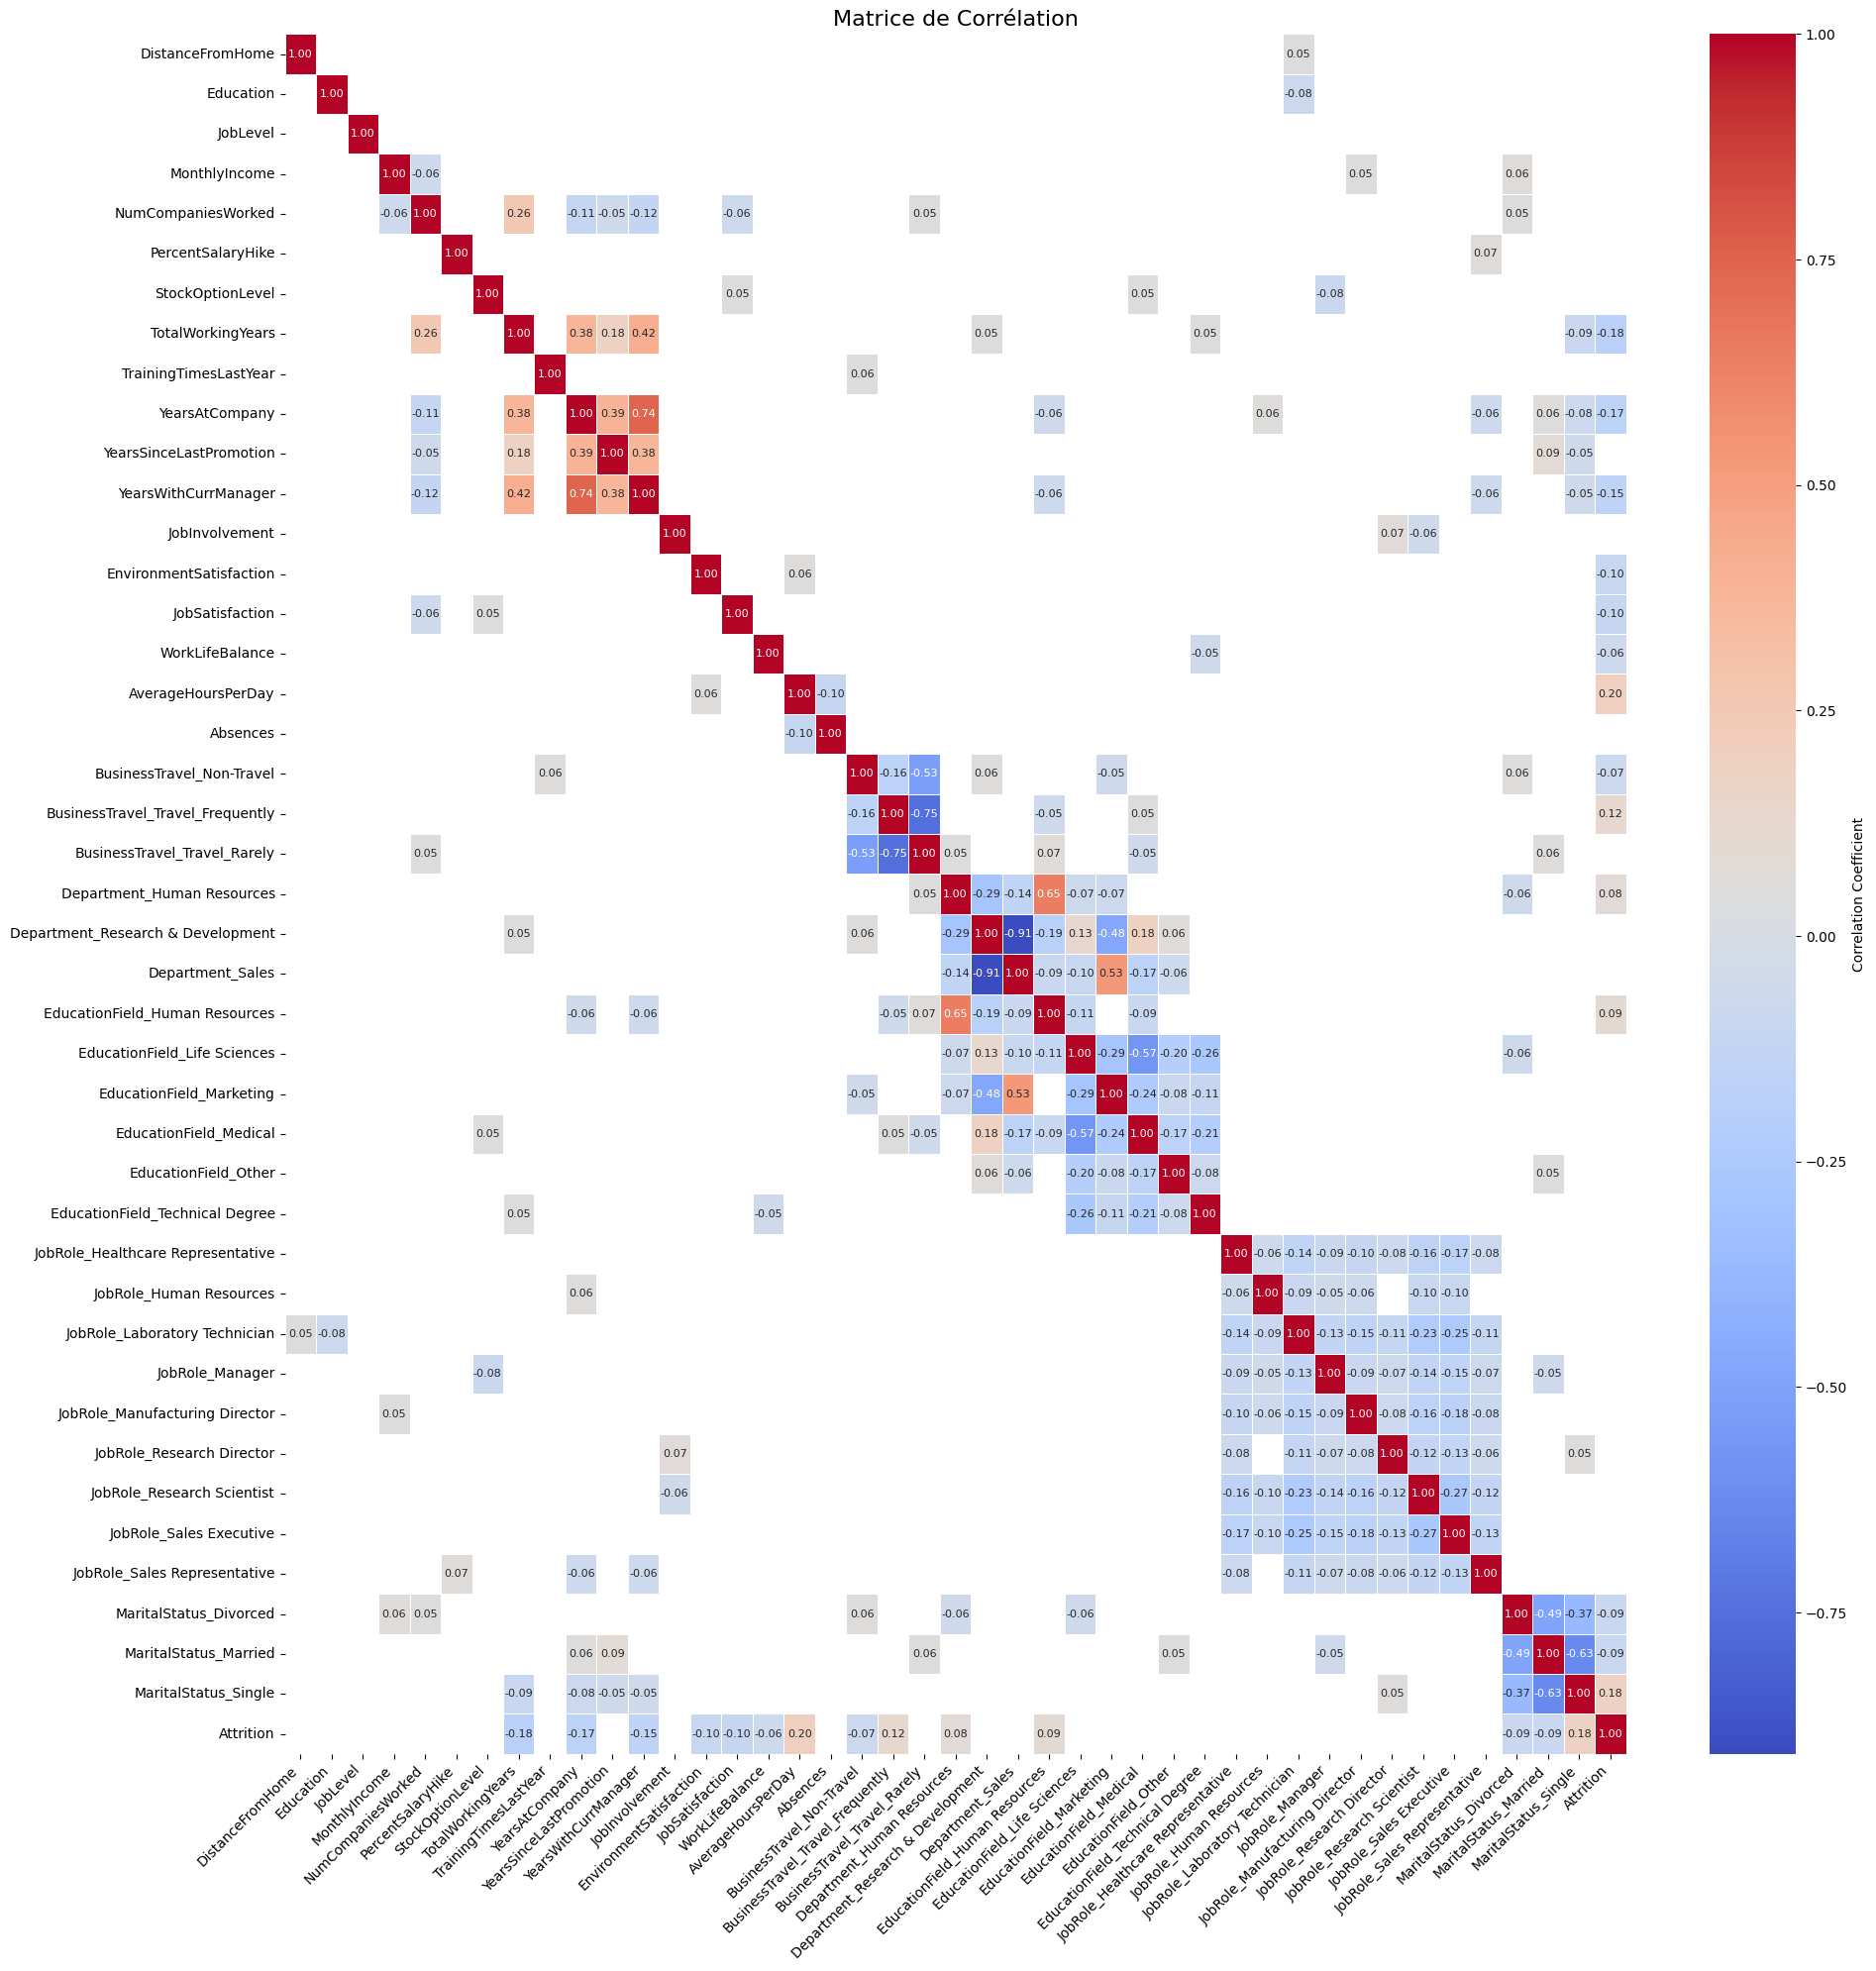

In [ ]:
# Sélection de toutes les colonnes numériques de processed_data
numerical_features_for_corr = processed_data.select_dtypes(include=['number']).columns.tolist()

# Exclure EmployeeID si présent
numerical_features_for_corr = [f for f in numerical_features_for_corr if f != 'EmployeeID']

# Ajouter 'Attrition' si elle n'est pas déjà dans la liste
if 'Attrition' not in numerical_features_for_corr:
    numerical_features_for_corr.append('Attrition')

# Enlever les colonnes qui se terminent par '_nan' (générées par le One-Hot Encoding pour les NaN)
numerical_features_for_corr = [col for col in numerical_features_for_corr if not col.endswith('_nan')]

# Calcul de la matrice de corrélation
corr_matrix = processed_data[numerical_features_for_corr].corr()

# Masquer les corrélations faibles
mask = corr_matrix.abs() < 0.05
corr_matrix = corr_matrix.mask(mask)

# Création de la heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 8},  # Réduction de la taille des annotations
            mask=mask)  # Appliquer le masque pour cacher les faibles corrélations
plt.title('Matrice de Corrélation', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des labels pour plus de lisibilité
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()  # Ajuster les marges pour éviter les chevauchements
plt.show()


Ce code calcule la corrélation entre les variables et l'attribut "**Attrition**", puis affiche une heatmap pour visualiser ces corrélations.

Les valeurs proches de 1 ou -1 montrent une forte corrélation, tandis que 0 indique aucune corrélation.

La heatmap permet de repérer rapidement quelles variables sont les plus liées à l'attrition des employés.

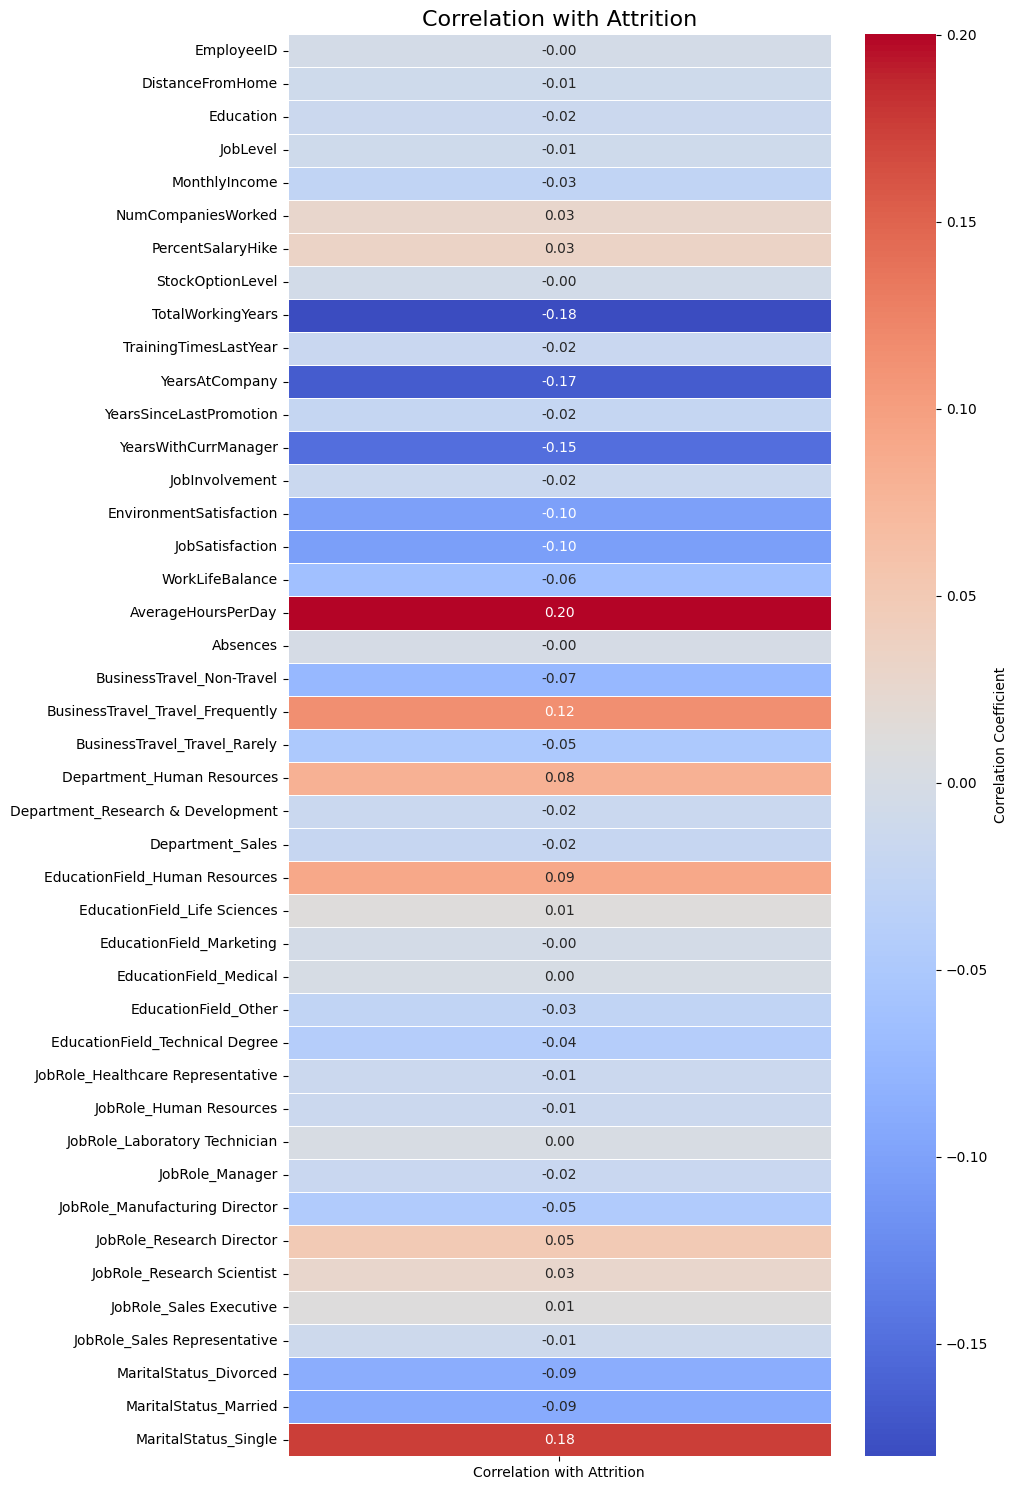

In [ ]:
# Calcul de la corrélation entre X et y
corr_with_y = X.corrwith(y)

# Convertion en DataFrame pour une meilleure présentation
corr_with_y_df = corr_with_y.to_frame(name='Correlation with Attrition')

corr_with_y_df = corr_with_y_df[~corr_with_y_df.index.str.endswith('_nan')]

# Affichage de la corrélation entre les features et la cible (Attrition)
plt.figure(figsize=(10, 15))
sns.heatmap(corr_with_y_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 10})
plt.title('Correlation with Attrition', fontsize=16)
plt.tight_layout()
plt.show()


Cette matrice est plus précise, on peut alors visualiser que les variables ayant la plus forte corrélation avec l'Attrition sont TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, EnvironnementSatisfaction et JobSatisfaction pour les valeurs qui réduisent le taux de départ, et AverageHoursPerDay, MaritalStatus_Single, Business_Travel_Travel_Frequently, Department_HumanResources et EducationField_HumanResources qui, elles, augmentent le taux de départ.

##<u>**C. Histogrammes**</u>

Les histogrammes ont été générés pour visualiser la répartition des variables numériques :

* Filtrage : La colonne EmployeeID a été exclue des variables numériques, car elle n'apporte pas d'information utile pour l'analyse.
* Disposition des graphiques : Le nombre de lignes et colonnes a été calculé dynamiquement pour afficher tous les histogrammes de manière ordonnée.
* Visualisation : Chaque histogramme montre la répartition des valeurs pour une variable, avec des axes clairement étiquetés (nom de la variable et fréquence).

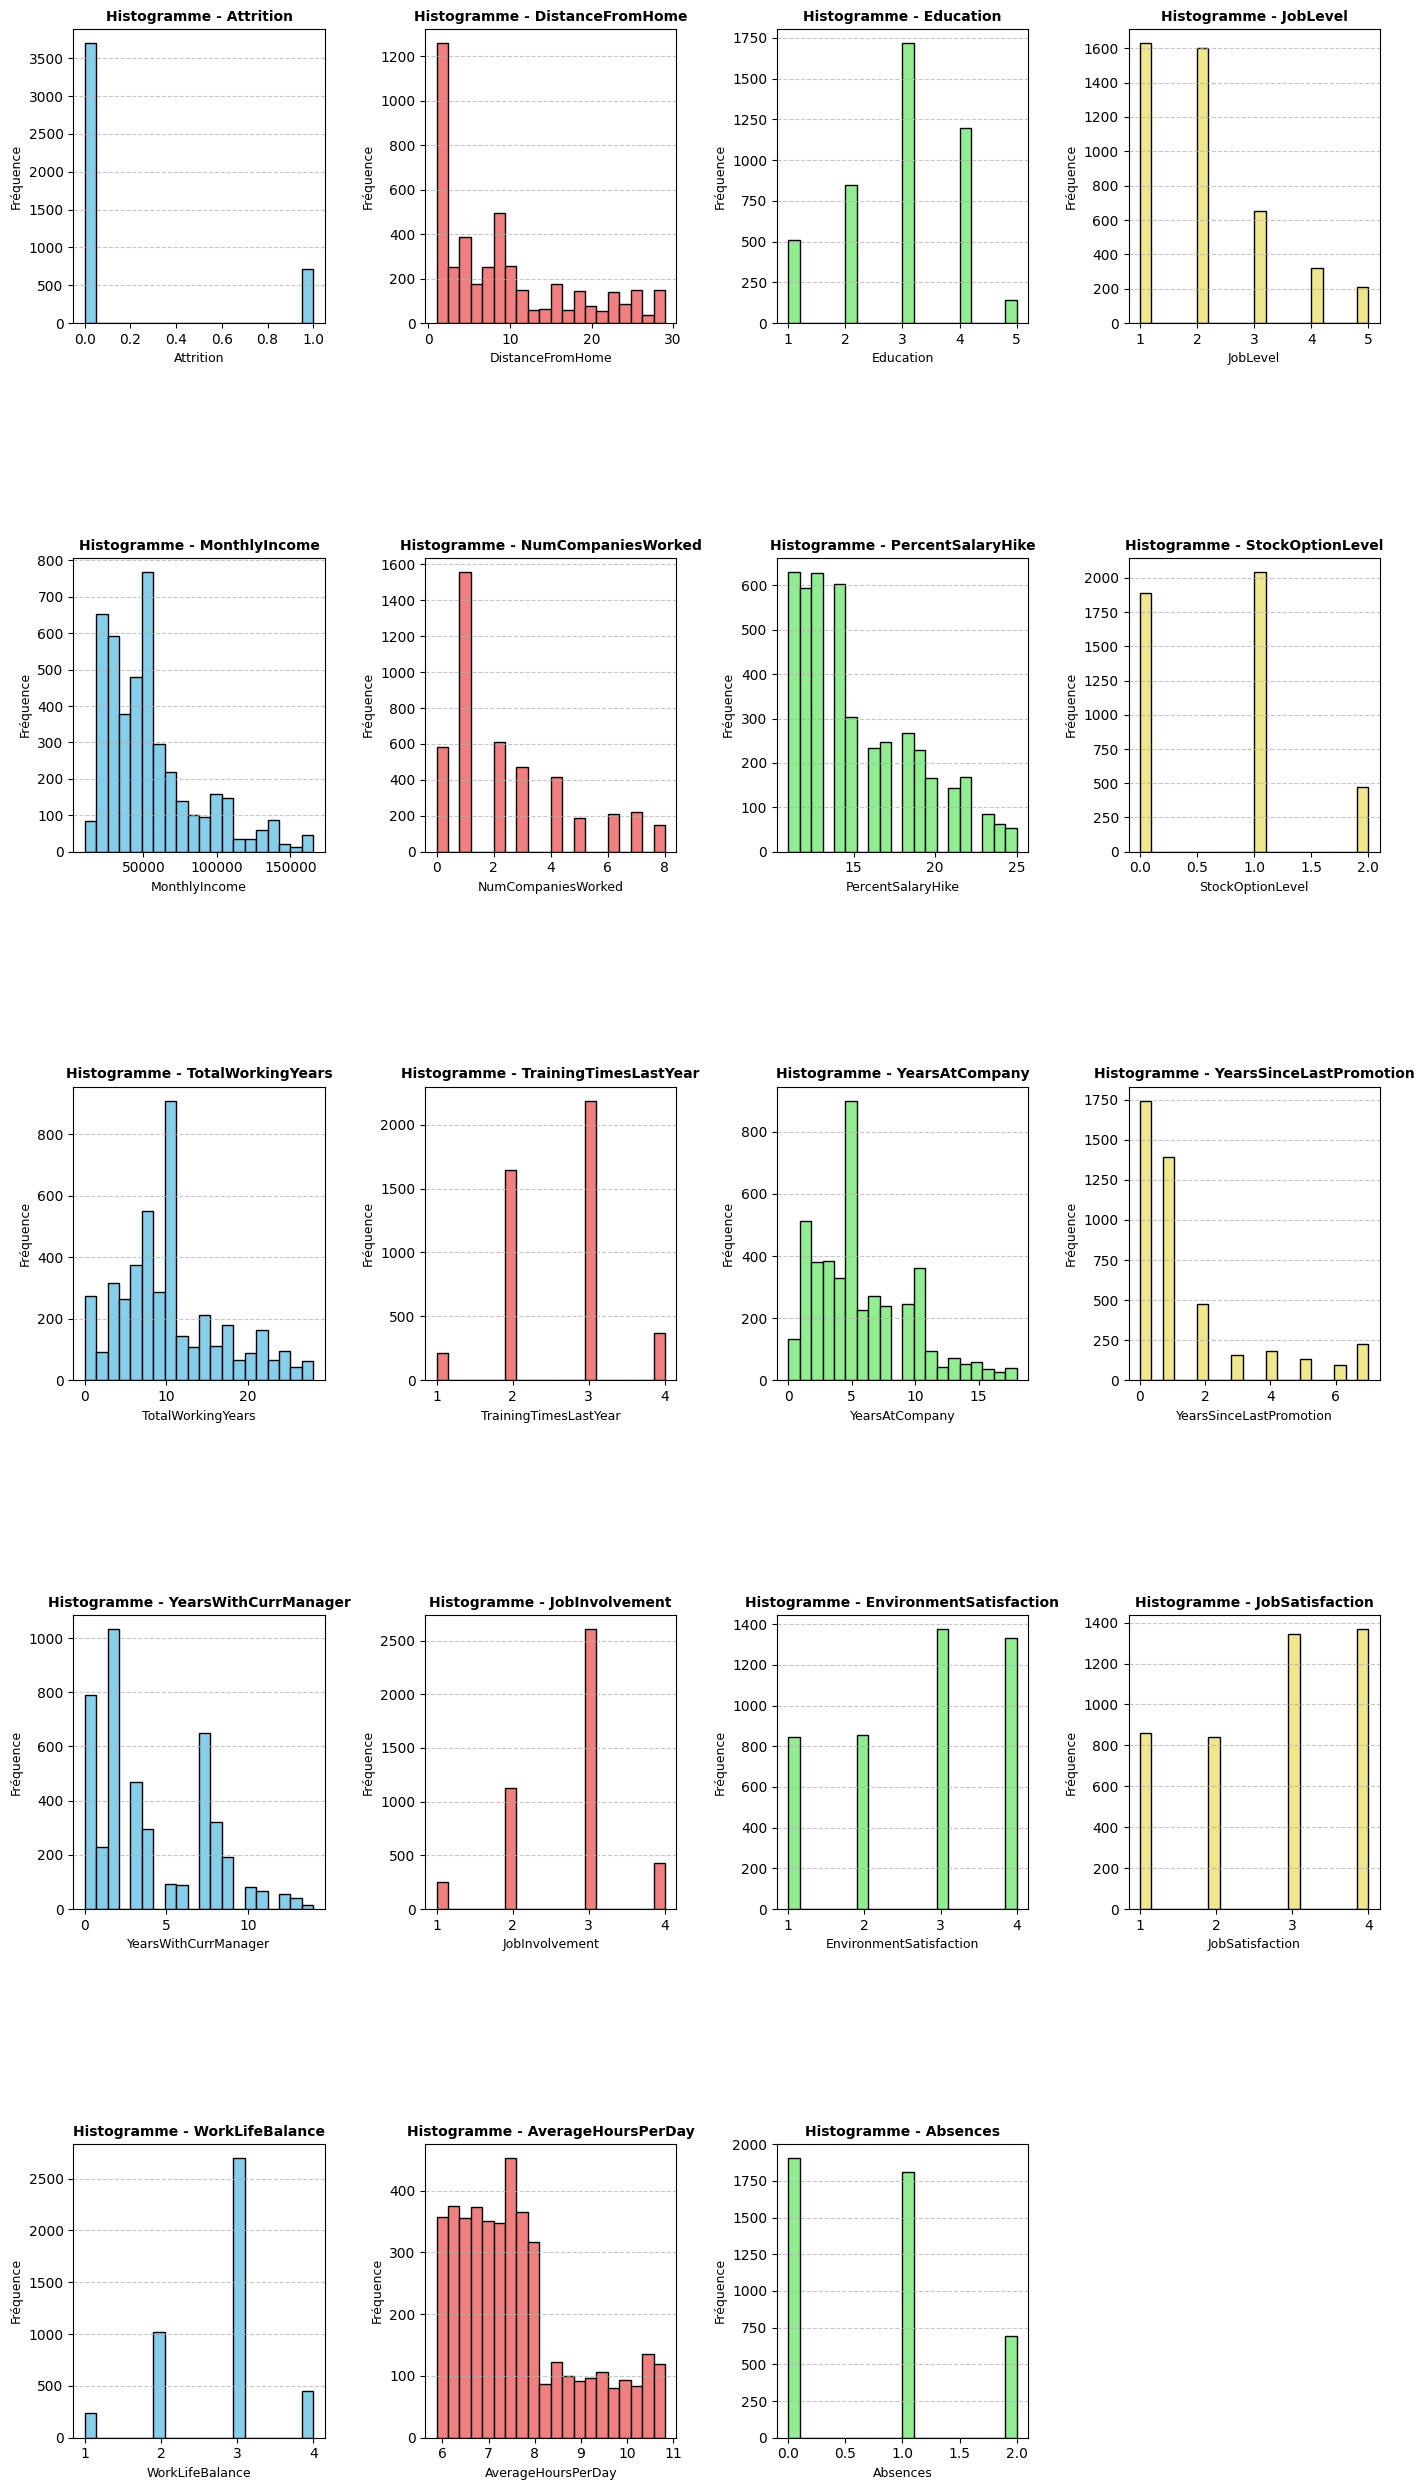

In [47]:
# Identifiez les colonnes numériques dans data_merged
numerical_features = data_merged.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Appel de la fonction
plot_histograms(
    data=data_merged,
    numerical_features=numerical_features,
    exclude_feature='EmployeeID',
    bins=20,
    figsize=(14, 5),
    num_cols=4
)

Afin de mieux comprendre l'intêret des histogrammes, nous avons décrit ces derniers :

- **DistanceFromHome :** La majorité des employés vit à une distance modérée du travail. Une distance plus importante pourrait augmenter le risque qu'un employé quitte l'entreprise.

- **Education :** Bien que la diversité des niveaux d'éducation soit présente, il semble que ceux ayant un niveau d’éducation élevé quittent moins fréquemment l'entreprise, bien que la corrélation soit faible.

- **JobLevel :** Les employés occupant des postes de niveau plus élevé ont tendance à quitter l'entreprise moins souvent.

- **MonthlyIncome :** Un salaire plus élevé est généralement associé à un risque réduit de départ de l'entreprise.

- **NumCompaniesWorked :** Une expérience plus importante dans différentes entreprises pourrait augmenter la probabilité qu’un employé quitte l'entreprise.

- **PercentSalaryHike :** Des augmentations salariales faibles peuvent être un facteur favorisant le départ des employés.

- **StockOptionLevel :** Moins d’options d'achat d’actions semblent être liées à un risque accru de départ des employés.

- **TotalWorkingYears :** Plus un employé a d'années d’expérience, moins il est susceptible de quitter l'entreprise.

- **TrainingTimesLastYear :** Bien que l’impact sur le départ des employés soit faible, un manque de formation pourrait indiquer un risque accru de départ.

- **YearsAtCompany :** Plus un employé a passé d’années dans l'entreprise, moins il est enclin à la quitter.

- **YearsSinceLastPromotion :** Les employés ayant eu une promotion récente sont moins susceptibles de quitter l'entreprise.

- **YearsWithCurrManager :** Les employés ayant passé beaucoup de temps sous la gestion d'un même manager ont tendance à quitter moins fréquemment l'entreprise.

- **JobInvolvement :** Une forte implication dans le travail est généralement associée à un risque plus faible que l'employé quitte l'entreprise.

- **EnvironmentSatisfaction :** Un environnement de travail satisfaisant est lié à une moindre probabilité de départ des employés.

- **JobSatisfaction :** Les employés satisfaits de leur travail sont moins susceptibles de quitter l'entreprise.

- **WorkLifeBalance :** Un bon équilibre entre vie professionnelle et vie personnelle diminue le risque que l’employé quitte l'entreprise.

- **AverageHoursPerDay :** Un nombre élevé d'heures de travail quotidiennes est associé à un risque plus élevé que l'employé quitte l'entreprise.

- **Absences :** Un nombre élevé d'absences peut être lié à une probabilité accrue de départ des employés.

Vérification des NaN

In [48]:
# Addition du nb de valeurs nulles dans les datasets pour vérifier l'existence des NaN
print("NaN dans X_train :\n", X_train.isnull().sum())
print("NaN dans X_test :\n", X_test.isnull().sum())
print("NaN dans y_train :\n", y_train.isnull().sum())
print("NaN dans y_test :\n", y_test.isnull().sum())

NaN dans X_train :
 EmployeeID                           0
DistanceFromHome                     0
Education                            0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
JobInvolvement                       0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
AverageHoursPerDay                   0
Absences                             0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
Educa

# <u>**IV. Création des Modèles d'IA**</u>

 - Remarquez-vous quelque chose d’anormal dans vos données ou résultats ?  
 - Quelles variables explicatives avez-vous sélectionnées pour le modèle, et pourquoi ?  
 - Comment le modèle s’ajuste-t-il aux données ?  

Ces questions nous aident à mieux comprendre les données, à évaluer la pertinence des choix effectués et à identifier les éventuelles améliorations à apporter au modèle.

Notre objectif est de prédire si un employé quitte l’entreprise, ce qui correspond à une tâche de classification binaire. La variable cible peut prendre deux valeurs :  
- **1** : L’employé quitte l’entreprise.  
- **0** : L’employé reste dans l’entreprise.  


 Avant de choisir le bon modèle, nous allons d'abord explorer les concepts clés des modèles suivants :

* Régression Logistique
* Perceptron
* SVM (Support Vector Machine)
* Naive Bayes (GaussianNB)
* Arbre de Décision (Decision Tree)
* Forêt Aléatoire (Random Forest)

## <u>**A. Etude des différents modèles**</u>

### <u>**Régression logistique**</u>

La régression logistique sert à prédire des résultats binaires (deux catégories possibles), comme "oui/non" ou "0/1".

Elle calcule une combinaison linéaire des variables d'entrée, puis applique une fonction sigmoïde pour obtenir une probabilité entre 0 et 1. Si la probabilité est supérieure à 0,5, le modèle prédit "1", sinon "0".



#### **Formulation Mathématique**

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
$$

Où :
- \( \beta_0 \) est l'ordonnée à l'origine (intercept)
- \( \beta_1, \beta_2, \ldots, \beta_n \) sont les coefficients des caractéristiques \( x_1, x_2, \ldots, x_n \)

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$$
P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
$$

#### **Fonction de Coût**

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Où :
- \( m \) est le nombre d'échantillons
- \( y^{(i)} \) est la valeur réelle pour l'échantillon \( i \)
- \( \hat{y}^{(i)} \) est la probabilité prédite pour l'échantillon \( i \)

#### **Entraînement du Modèle**

L'entraînement du modèle de régression logistique consiste à trouver les paramètres qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.


Matrice de Confusion (Régression Logistique) :
 [[1080   35]
 [ 148   60]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1115
           1       0.63      0.29      0.40       208

    accuracy                           0.86      1323
   macro avg       0.76      0.63      0.66      1323
weighted avg       0.84      0.86      0.84      1323

AUC-ROC (Régression Logistique) :
 0.6285357019661952


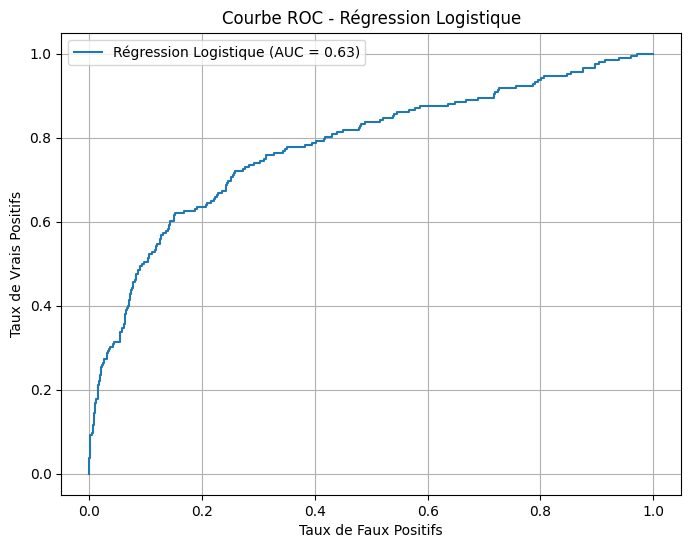

In [50]:
# Initialisation et entraînement du modèle
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Régression Logistique (AUC = {roc_auc_log_reg:.2f})")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Régression Logistique")
plt.legend()
plt.grid(True)
plt.show()

Ce graphique représente la courbe ROC (Receiver Operating Characteristic). L’objectif de la courbe est de visualiser le compromis entre le taux de faux positifs et le taux de vrais positifs pour différents seuils de décision.

La forme de la courbe indique que le modèle a des performances limitées. L’aire sous la courbe (AUC), qui est de 0,63, reflète une performance modérée. Une valeur de 0,63 signifie que, dans environ 63% des cas, le modèle classera correctement un exemple positif. Cela reste supérieur à un modèle aléatoire (AUC = 0,5), mais loin d’un modèle performant (AUC proche de 1).

Ce graphique révèle également que le modèle parvient mieux à éviter les faux positifs qu’à identifier les vrais positifs. Autrement dit, il est efficace pour confirmer les exemples négatifs mais beaucoup moins pour détecter les exemples positifs.

En conclusion, bien que la courbe ROC montre que le modèle possède une certaine capacité de classification, ses performances sont insuffisantes pour des cas où la précision et le rappel pour la classe positive sont critiques.

### <u>**Perceptron**</u>

Le Perceptron est un modèle de classification binaire qui permet de prédire des résultats comme "0" ou "1".

Il fonctionne en calculant une combinaison linéaire des variables d'entrée et en appliquant une fonction de seuil (activation) pour déterminer la classe de l'observation. Si le résultat de la combinaison linéaire dépasse un certain seuil, le modèle prédit "1", sinon "0".

Le Perceptron ajuste ses poids pendant l'entraînement pour minimiser les erreurs de prédiction.

#### **Formulation Mathématique**

Le perceptron calcule une somme pondérée des caractéristiques et applique une fonction de seuil pour déterminer la classe prédite. La sortie est définie comme suit :
$$
\hat{y} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}
$$
avec $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$, où $\beta_0$ est le biais et $\beta_1, \beta_2, \ldots, \beta_n$ sont les poids des caractéristiques.

#### **Algorithme d'Apprentissage**

L'algorithme ajuste les poids en fonction des erreurs de classification. Pour chaque échantillon $(x^{(i)}, y^{(i)})$ :
1. Calculer la sortie prédite :
$$
\hat{y}^{(i)} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}
$$
2. Mettre à jour les poids si la prédiction est incorrecte :
$$
\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}
$$
où $\eta$ est le taux d'apprentissage.

#### **Fonction de Coût**

Le perceptron met à jour les poids directement en fonction des erreurs, sans utiliser de fonction de coût comme la régression logistique.







Matrice de Confusion (Perceptron) :
 [[857 258]
 [ 90 118]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1115
           1       0.31      0.57      0.40       208

    accuracy                           0.74      1323
   macro avg       0.61      0.67      0.62      1323
weighted avg       0.81      0.74      0.76      1323

AUC-ROC (Perceptron) :
 0.6679587788892721


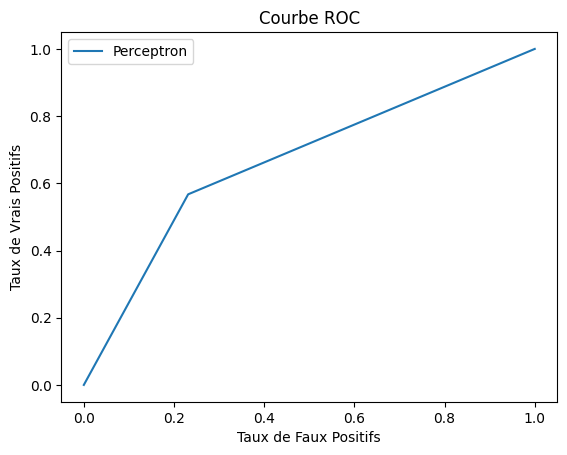

In [51]:
# Initialisation et entraînement du modèle
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

La forme de la courbe indique que le modèle a des performances correctes mais limitées. L’aire sous la courbe (AUC), qui est de 0,67, reflète une performance modérée. Une valeur de 0,67 signifie que, dans environ 67% des cas, le modèle classera correctement un exemple positif avec une probabilité plus élevée qu’un exemple négatif. Cela est supérieur à un modèle aléatoire (AUC = 0,5), mais il reste encore de la marge pour atteindre des performances optimales (AUC proche de 1).

Ce graphique révèle que le modèle parvient mieux à équilibrer les faux positifs et les vrais positifs que d’autres modèles plus biaisés. Cependant, il reste des lacunes importantes, notamment dans sa capacité à identifier efficacement les exemples positifs. La précision pour la classe 1 est relativement faible (31%), bien que le rappel soit meilleur (57%). Cela indique que le modèle est capable de détecter une proportion décente des cas positifs, mais avec de nombreux faux positifs.

En conclusion, bien que la courbe ROC et l’AUC montrent que le modèle Perceptron possède une capacité de classification modérée, ses performances sont insuffisantes dans des contextes où une forte précision pour la classe positive est requise.

### <u>**Support Vector Machine (SVM)**</u>

Le SVM (Support Vector Machine) est un modèle de classification qui sépare les données en deux classes en trouvant un hyperplan avec la marge maximale. Avec probability=True, il génère des probabilités pour chaque prédiction.

Si la probabilité d'appartenir à la classe "1" est supérieure à un seuil, il prédit "1", sinon "0". Le modèle est évalué via la matrice de confusion, le rapport de classification, le score AUC-ROC, et la courbe ROC.

#### **Principe de Fonctionnement**

Le SVM cherche l'hyperplan qui maximise la marge de séparation entre les classes. La marge est la distance entre l'hyperplan et les points les plus proches de chaque classe, appelés vecteurs de support. L'hyperplan est défini par l'équation :

$$ \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0 $$

#### **Maximisation de la Marge**

L'objectif du SVM est de maximiser la marge en résolvant le problème d'optimisation :

$$ \text{Minimiser} \ \frac{1}{2} \|\beta\|^2 $$

Sous les contraintes :

$$ y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 $$

#### **Fonction de Coût et Régularisation**

Pour les données non linéaires, les SVM utilisent la "soft margin" qui permet des erreurs de classification avec des variables de relâchement $\xi_i$ :

$$ \text{Minimiser} \ \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{m} \xi_i $$

Sous les contraintes :

$$ y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 - \xi_i $$

#### **Noyaux (Kernels)**

Les SVM utilisent des noyaux pour transformer les données dans un espace de plus haute dimension afin de trouver un hyperplan linéaire. Les noyaux courants incluent linéaire, polynomial, RBF et sigmoïde.

#### **Avantages et Inconvénients**

**Avantages** :
- Efficace dans les espaces de haute dimension
- Utilise les vecteurs de support, ce qui économise de la mémoire
- Flexible avec les noyaux

**Inconvénients** :
- Sensible au choix des hyperparamètres et du noyau
- L'entraînement devient complexe avec de grandes données
- Moins intuitif à interpréter que d'autres modèles

Le SVM est un algorithme puissant pour les tâches de classification, particulièrement quand les données ne sont pas linéairement séparables.


Matrice de Confusion (SVM) :
 [[1106    9]
 [ 121   87]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1115
           1       0.91      0.42      0.57       208

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0.89      1323

AUC-ROC (SVM) :
 0.7050987409451535


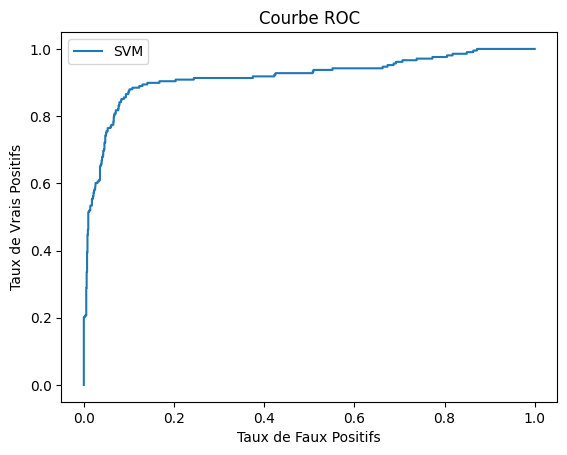

In [52]:
# Initialisation et entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

La forme de la courbe et l’aire sous la courbe (AUC), qui est de 0,71, montrent que le modèle a des performances acceptables. Une AUC de 0,71 indique qu’environ 71% du temps, le modèle classera correctement un exemple positif avec une probabilité plus élevée qu’un exemple négatif. Cela représente une amélioration significative par rapport à un modèle aléatoire (AUC = 0,5), mais il reste loin d’un modèle optimal (AUC proche de 1).

Les métriques de classification révèlent un déséquilibre dans les performances entre les deux classes. Le modèle est extrêmement performant pour la classe 0 (exemples négatifs), avec une précision et un rappel très élevés (90% et 99%, respectivement). Cependant, pour la classe 1 (exemples positifs), le rappel chute à 42%, ce qui signifie que le modèle détecte moins de la moitié des cas positifs, malgré une bonne précision de 91%. Ce déséquilibre est également reflété dans les valeurs de la matrice de confusion, où 121 faux négatifs sont observés.

En conclusion, le modèle SVM est globalement efficace pour prédire les exemples négatifs, mais ses performances pour détecter les exemples positifs sont limitées. Bien que l’AUC montre une capacité modérée de classification, le faible rappel pour la classe positive pourrait poser problème dans des contextes où cette détection est essentielle.

### <u>**Naive Bayès**</u>

Le Naive Bayes (GaussianNB) est un modèle de classification qui suppose que les caractéristiques sont indépendantes. Il utilise le théorème de Bayes pour calculer la probabilité d'une observation d'appartenir à chaque classe.

Le modèle est entraîné avec les données d'entraînement et prédit les classes pour les données de test. Il est évalué à l'aide de la matrice de confusion, du rapport de classification, du score AUC-ROC et de la courbe ROC.

#### **Principe de Fonctionnement**

Le modèle Naive Bayes utilise le théorème de Bayes pour calculer la probabilité d'une classe donnée des caractéristiques. Il est exprimé ainsi :

$$ P(C_k | \mathbf{x}) = \frac{P(C_k) \cdot P(\mathbf{x} | C_k)}{P(\mathbf{x})} $$

Où :
- $P(C_k | \mathbf{x})$ : probabilité de la classe $C_k$ donnée les caractéristiques $\mathbf{x}$
- $P(C_k)$ : probabilité a priori de la classe
- $P(\mathbf{x} | C_k)$ : probabilité des caractéristiques données la classe
- $P(\mathbf{x})$ : probabilité des caractéristiques

#### **Hypothèse d'Indépendance**

Naive Bayes suppose que les caractéristiques sont indépendantes, étant donné la classe :

$$ P(\mathbf{x} | C_k) = \prod_{i=1}^{n} P(x_i | C_k) $$

Cette hypothèse simplifie les calculs.

#### **Types de Modèles Naive Bayes**

- **Gaussian Naive Bayes** : pour les données continues, avec distribution normale.
- **Multinomial Naive Bayes** : pour les données discrètes (par exemple, comptage de mots).
- **Bernoulli Naive Bayes** : pour les données binaires.

#### **Fonction de Décision**

Le modèle choisit la classe $C_k$ qui maximise :

$$ P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k) $$

#### **Avantages et Inconvénients**

**Avantages** :
- Facile à implémenter et rapide
- Efficace avec de grands ensembles de données
- Adapté pour les textes et les recommandations

**Inconvénients** :
- Hypothèse d'indépendance parfois irréaliste
- Ne prend pas en compte les interactions entre caractéristiques
- Moins précis que certains autres modèles

Le Naive Bayes est un algorithme simple et efficace, idéal pour les applications nécessitant rapidité et simplicité.


Matrice de Confusion (Naive Bayes) :
 [[990 125]
 [122  86]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1115
           1       0.41      0.41      0.41       208

    accuracy                           0.81      1323
   macro avg       0.65      0.65      0.65      1323
weighted avg       0.81      0.81      0.81      1323

AUC-ROC (Naive Bayes) :
 0.6506769575715764


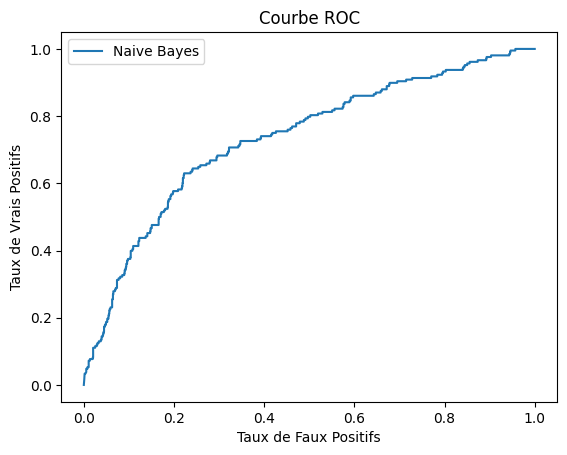

In [53]:
# Initialisation et entraînement du modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

L’aire sous la courbe (AUC), qui est de 0,65, indique que le modèle possède une capacité de classification légèrement au-dessus d’un modèle aléatoire (AUC = 0,5). Cela signifie qu’il classera correctement un exemple positif dans environ 65 % des cas. Il reste quand même loin d’être optimal (AUC proche de 1).

Les métriques de classification révèlent un déséquilibre important dans les performances entre les deux classes. Pour la classe 0 (exemples négatifs), le modèle obtient une précision et un rappel élevés, tous deux à 89 %, ce qui montre qu’il est efficace pour prédire les exemples négatifs. Cependant, pour la classe 1 (exemples positifs), le modèle a une précision et un rappel faibles, tous deux à 41 %. Cela signifie que le modèle ne détecte qu’environ 41 % des cas positifs, avec une précision relativement modeste. La matrice de confusion corrobore ces résultats, avec 125 faux positifs et 122 faux négatifs.

En conclusion, le modèle Naive Bayes montre une performance globalement moyenne. S’il est efficace pour prédire les exemples négatifs, il est limité pour détecter correctement les exemples positifs. Cette faiblesse pourrait poser problème dans des contextes où l’identification des cas positifs est cruciale.

### <u>**Decision Tree**</u>

Le Decision Tree (Arbre de Décision) est un modèle de classification qui divise les données en sous-groupes en fonction de critères simples (comme des seuils sur les variables). À chaque division, le modèle choisit la meilleure caractéristique qui sépare le mieux les classes.

Le modèle est entraîné sur les données d'entraînement et prédit les classes pour les données de test. Les performances sont évaluées à l'aide de la matrice de confusion, du rapport de classification, du score AUC-ROC, et de la courbe ROC.

#### **Principe de Fonctionnement**

Un arbre de décision divise les données en sous-ensembles en fonction des caractéristiques, créant une structure arborescente. Chaque nœud représente une caractéristique, et les feuilles représentent les classes ou valeurs prédites. Le processus se répète jusqu'à ce que les nœuds soient purs ou une condition d'arrêt soit atteinte.

#### **Construction de l'Arbre**

1. **Sélection de la Caractéristique** : Choix de la caractéristique qui divise le mieux les données.
2. **Création de Nœuds** : Division des données en sous-ensembles.
3. **Répartition et Arrêt** : Répétition jusqu'à ce que les nœuds soient purs ou que la profondeur maximale soit atteinte.

#### **Critères de Sélection**

- **Entropie et Gain d'Information** : Mesure de la réduction du désordre.
- **Indice de Gini** : Mesure de l'impureté des données.

#### **Avantages et Inconvénients**

**Avantages** :
- Facile à interpréter
- Aucun prétraitement des données nécessaire
- Gère les données manquantes

**Inconvénients** :
- Risque de surapprentissage
- Sensible aux variations des données
- Privilégie les caractéristiques avec plus de valeurs distinctes

Les arbres de décision sont puissants pour la classification et la régression, avec une bonne interprétabilité.









Matrice de Confusion (Decision Tree) :
 [[1087   28]
 [  24  184]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1115
           1       0.87      0.88      0.88       208

    accuracy                           0.96      1323
   macro avg       0.92      0.93      0.93      1323
weighted avg       0.96      0.96      0.96      1323

AUC-ROC (Decision Tree) :
 0.929751638496033


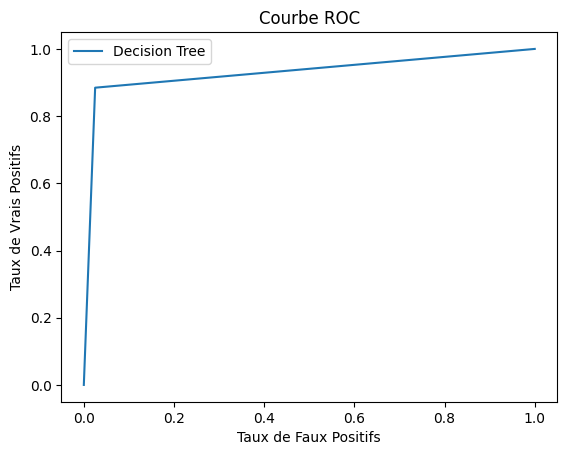

In [54]:
# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

L’aire sous la courbe (AUC) est de 0,93, ce qui reflète une excellente performance du modèle. Une AUC de 0,93 indique que, dans 93 % des cas, le modèle classera correctement un exemple positif par rapport à un exemple négatif. Cela suggère que le modèle est bien adapté à la tâche de classification.

Les métriques de classification confirment ces performances élevées. Pour la classe 0 (exemples négatifs), la précision, le rappel et le f1-score sont tous proches de 0,98, ce qui montre que le modèle prédit avec une grande fiabilité les exemples négatifs. Pour la classe 1 (exemples positifs), les performances restent également solides, avec une précision de 0,87 et un rappel de 0,88, aboutissant à un f1-score de 0,88. La matrice de confusion appuie ces résultats, avec seulement 28 faux positifs et 24 faux négatifs.

En conclusion, l’arbre de décision montre des performances globalement excellentes. Il excelle à classifier les deux classes, avec un équilibre entre précision et rappel, ce qui le rend adapté pour des cas où une haute précision et un faible taux d’erreur sont essentiels. Toutefois, si les données évoluent ou deviennent plus complexes, une régularisation ou un ajustement des hyperparamètres pourrait être nécessaire pour éviter un risque potentiel de surapprentissage.

### <u>**Random Forest**</u>

Le Random Forest est un modèle d'ensemble qui utilise plusieurs arbres de décision pour faire des prédictions. Chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement, et la prédiction finale est obtenue en prenant la moyenne des prédictions des arbres. Cela améliore la stabilité et la précision du modèle.

Le modèle est entraîné sur les données d'entraînement et prédit les classes pour les données de test. Les performances sont évaluées avec la matrice de confusion, le rapport de classification, le score AUC-ROC, et la courbe ROC.

#### **Principe de Fonctionnement**

Une forêt aléatoire est composée de plusieurs arbres de décision, chacun construit sur un échantillon aléatoire des données et des caractéristiques. Les prédictions des arbres sont agrégées pour donner une prédiction finale.

#### **Construction**

1. **Échantillonnage Bootstrap** : Création d'échantillons aléatoires avec remplacement pour chaque arbre.
2. **Sélection de Caractéristiques** : Choix aléatoire d'un sous-ensemble de caractéristiques à chaque nœud.
3. **Construction des Arbres** : Création d'arbres sans élagage.
4. **Agrégation des Prédictions** : Prédictions combinées par vote majoritaire (classification) ou moyenne (régression).

#### **Avantages et Inconvénients**

**Avantages** :
- Réduit le surapprentissage
- Robuste et insensible aux variations des données
- Gère bien les caractéristiques et les données manquantes

**Inconvénients** :
- Plus complexe et coûteux en temps de calcul
- Moins interprétable que les arbres individuels

Les forêts aléatoires sont efficaces pour améliorer les performances prédictives tout en réduisant les faiblesses des arbres de décision.


Matrice de Confusion (Random Forest) :
 [[1115    0]
 [  36  172]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1115
           1       1.00      0.83      0.91       208

    accuracy                           0.97      1323
   macro avg       0.98      0.91      0.94      1323
weighted avg       0.97      0.97      0.97      1323

AUC-ROC (Random Forest) :
 0.9134615384615384


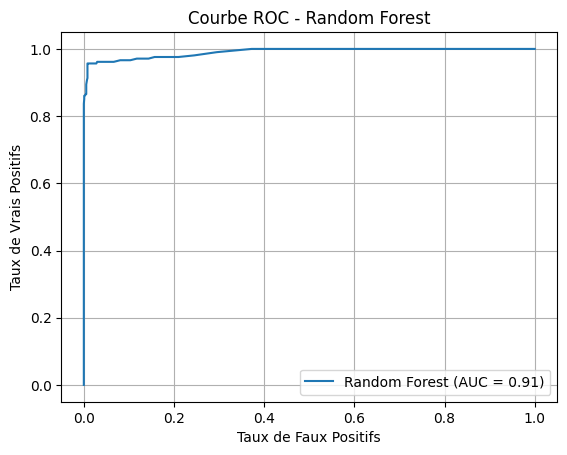

In [55]:
# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

L’aire sous la courbe (AUC) est de 0,91, indiquant une excellente performance globale. Une AUC de 0,91 signifie que dans 91 % des cas, le modèle différenciera correctement un exemple positif d’un exemple négatif. Cela le positionne comme un modèle fiable pour des tâches de classification.

Les métriques de classification confirment ces performances remarquables. La classe 0 (exemples négatifs) bénéficie d’une précision, d’un rappel et d’un f1-score parfaits ou presque (0,97 à 1,00), indiquant une capacité quasi infaillible à identifier correctement les exemples négatifs. Pour la classe 1 (exemples positifs), le modèle atteint une précision parfaite (1,00) et un rappel de 0,83, aboutissant à un f1-score de 0,91. La matrice de confusion montre seulement 36 faux négatifs et aucun faux positif, ce qui est exceptionnel.

En conclusion, le modèle Random Forest offre des performances très solides, avec une précision et une capacité de généralisation élevées. Sa capacité à bien gérer les deux classes, tout en minimisant les erreurs, le rend particulièrement adapté à notre situation nécessitant une classification fiable et équilibrée.

## <u>**B. Entraînements et Prédictions**</u>

Ce code entraîne et teste plusieurs modèles de classification (Perceptron, Régression Logistique, SVM, Naive Bayes, Arbre de Décision, Forêt Aléatoire) sur les mêmes données pour comparer leurs performances et choisir le meilleur modèle.

In [56]:
models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

## <u>**C. Etude comparative entre les modèles SK-Learn**</u>

Nous préparons différents modèles de classification pour les entraîner sur les données d'entraînement et comparer leurs performances sur les données de test. Cela nous permettra d'identifier le modèle le plus adapté à notre problème.

### <u>**Principales Métriques**</u>

Ce code évalue et affiche la performance de chaque modèle de classification à l'aide de la matrice de confusion et du rapport de classification.

*  display_metrics : Calcule et affiche la matrice de confusion et le rapport de classification pour un modèle donné.
*  Boucle : Pour chaque modèle, les métriques sont calculées en comparant les prédictions (y_pred) avec les vraies valeurs (y_test), et les résultats sont affichés.
Cela permet de comparer les performances des différents modèles de manière concise.

In [57]:
# Fonction pour afficher les résultats
def display_metrics(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"Rapport de Classification ({model_name}) :\n", class_report)

# Calcul des métriques
for name, y_pred in predictions.items():
    display_metrics(y_test, y_pred, name)
    print()

Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1115
           1       0.31      0.57      0.40       208

    accuracy                           0.74      1323
   macro avg       0.61      0.67      0.62      1323
weighted avg       0.81      0.74      0.76      1323


Rapport de Classification (LogisticRegression) :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1115
           1       0.63      0.29      0.40       208

    accuracy                           0.86      1323
   macro avg       0.76      0.63      0.66      1323
weighted avg       0.84      0.86      0.84      1323


Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1115
           1       0.91      0.42      0.57       208

    accuracy                           0.90      1323

### <u>**Affichage des matrices de confusion**</u>

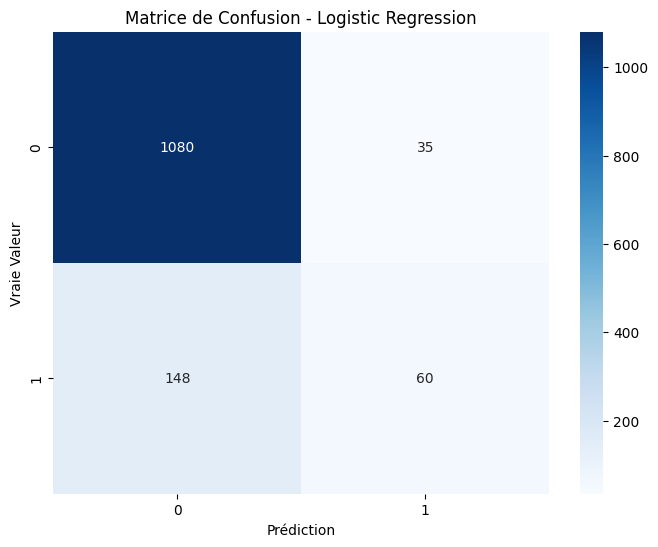

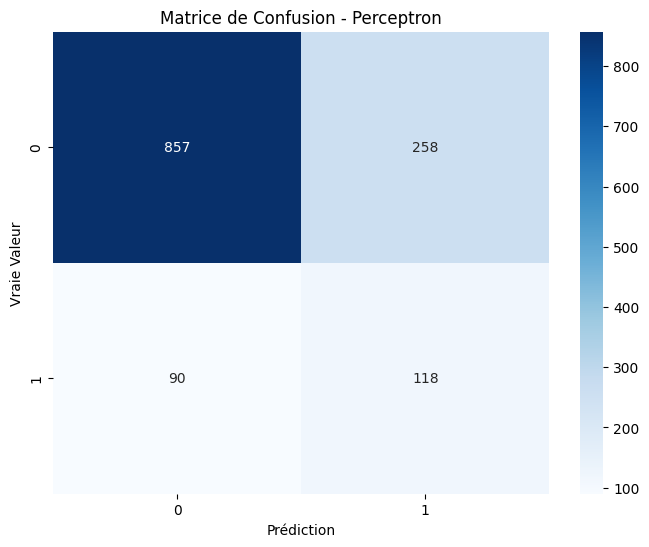

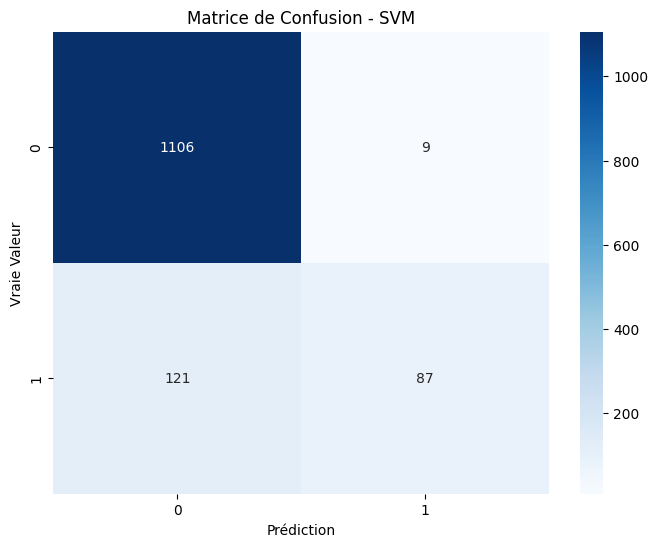

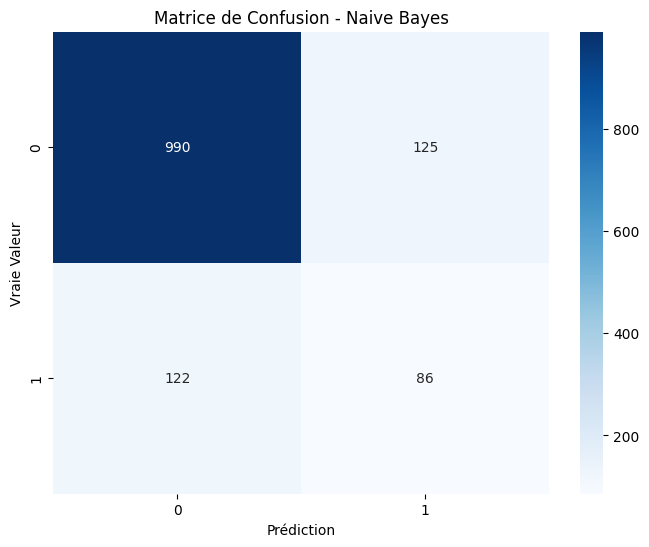

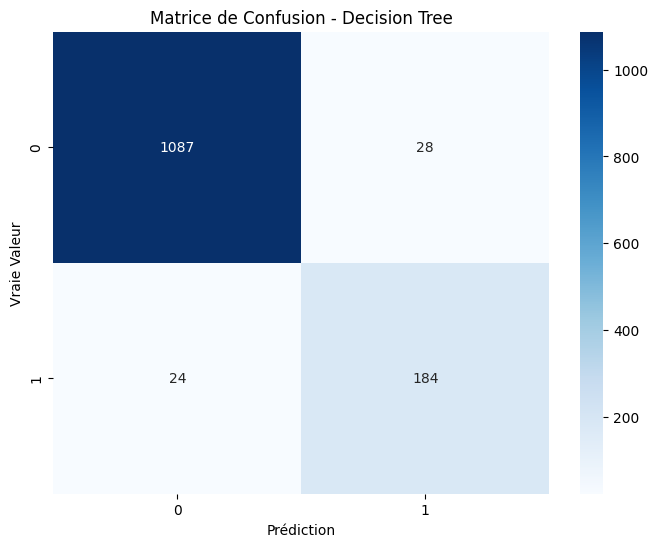

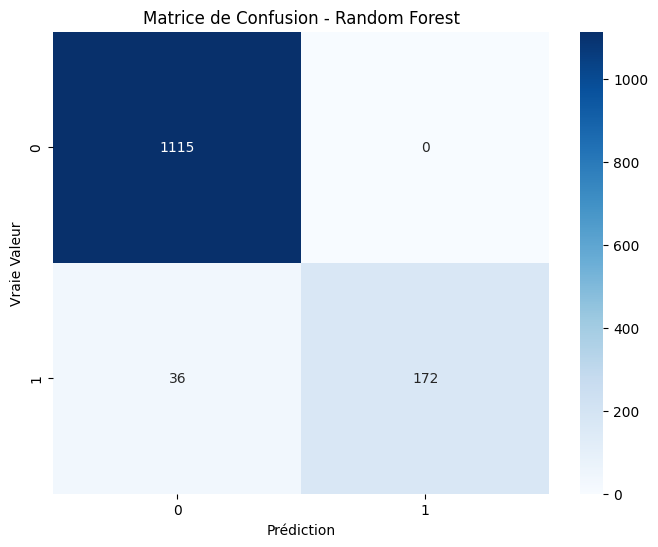

In [58]:
# Dictionnaire contenant les prédictions des différents modèles
predictions = {
    "Logistic Regression": y_pred_log_reg,
    "Perceptron": y_pred_perceptron,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

# Affichage des matrices de confusion
for name, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Matrice de Confusion - {name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie Valeur')
    plt.show()

### <u>**Comparaison des courbes: ROC**</u>

Ce code trace deux courbes pour évaluer la performance des modèles de classification :

*  Courbes de Précision-Rappel (Precision-Recall) : La précision est tracée en fonction du rappel pour chaque modèle. Cela permet d'analyser la capacité du modèle à identifier correctement les classes positives tout en minimisant les faux positifs. Ces courbes nous aident à mieux comprendre les performances des modèles, en particulier dans des contextes de données déséquilibrées où la classe positive est moins représentée.

*  Courbes ROC (Receiver Operating Characteristic) : La courbe ROC montre la relation entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR). L'AUC (Area Under the Curve) est également calculée pour chaque modèle, ce qui permet d'évaluer globalement la capacité de chaque modèle à classer correctement les instances, indépendamment du seuil de décision. Ces courbes sont particulièrement utiles pour comparer la performance des modèles sur des tâches de classification binaire.
Ces graphiques et valeurs (Précision, Rappel, AUC) nous aident à comparer les modèles et à choisir celui qui offre le meilleur compromis entre la détection des classes positives et la gestion des erreurs.

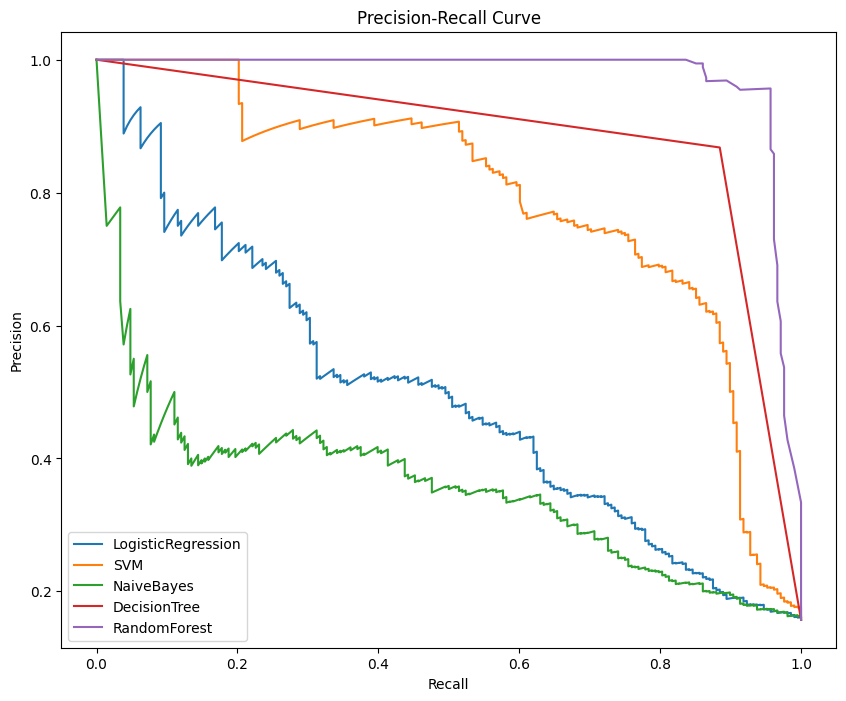

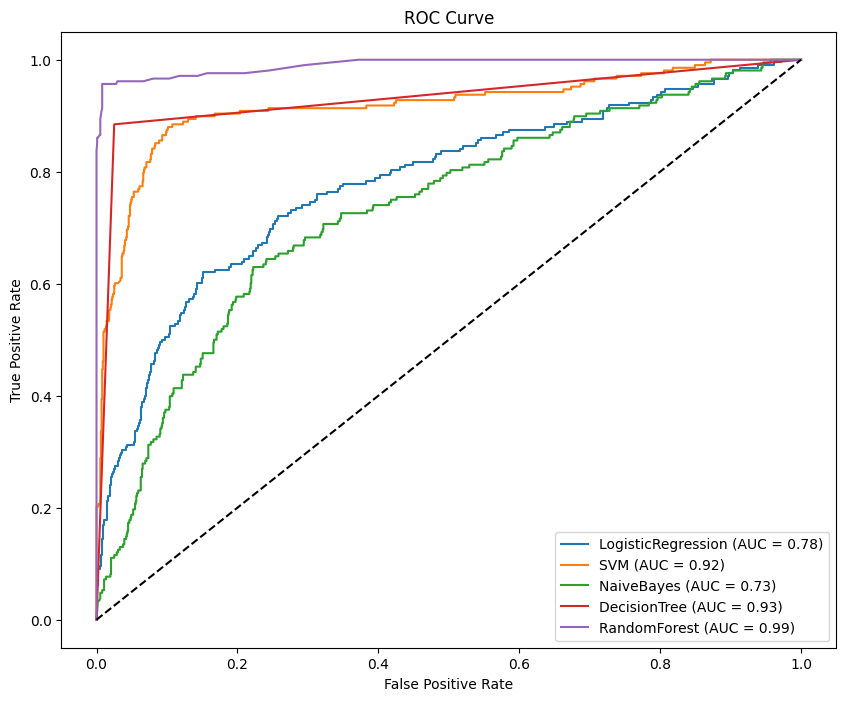

In [59]:
# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Ce code évalue la performance des modèles de classification en calculant la **précision**, **le rappel** et **le score F1**. Pour chaque modèle, il prédit les étiquettes et calcule ces scores, puis les affiche.

Un boxplot est ensuite tracé pour comparer la distribution de ces scores entre les modèles, ce qui permet d'identifier les modèles les plus performants et stables.

### <u>**Calculer de statistiques pour comparer les modèles**</u>

Statistiques pour Perceptron:
Precision: 0.31382978723404253
Recall: 0.5673076923076923
F1 Score: 0.4041095890410959

Statistiques pour LogisticRegression:
Precision: 0.631578947368421
Recall: 0.28846153846153844
F1 Score: 0.39603960396039606

Statistiques pour SVM:
Precision: 0.90625
Recall: 0.4182692307692308
F1 Score: 0.5723684210526315

Statistiques pour NaiveBayes:
Precision: 0.4075829383886256
Recall: 0.41346153846153844
F1 Score: 0.4105011933174224

Statistiques pour DecisionTree:
Precision: 0.8679245283018868
Recall: 0.8846153846153846
F1 Score: 0.8761904761904762

Statistiques pour RandomForest:
Precision: 1.0
Recall: 0.8269230769230769
F1 Score: 0.9052631578947369



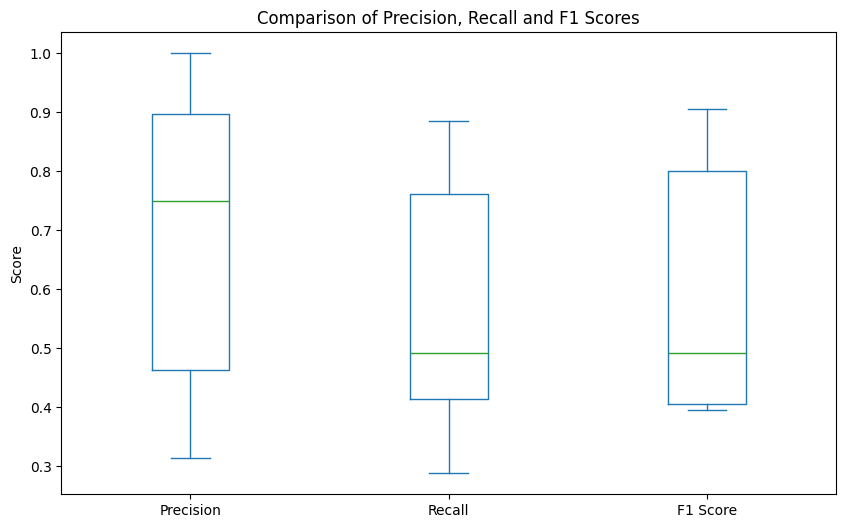

In [60]:
precision_scores = []
recall_scores = []
f1_scores = []

# Calcul des scores de précision, rappel et F1 pour chaque modèle
for name, model in models.items():
    if hasattr(model, "predict"):  # S'assurer que le modèle a une méthode de prédiction
        y_pred = model.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

        print(f"Statistiques pour {name}:")
        print(f"Precision: {precision_scores[-1]}")
        print(f"Recall: {recall_scores[-1]}")
        print(f"F1 Score: {f1_scores[-1]}")
        print()

# Création du DataFrame pour afficher les scores
score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Tracer un boxplot des scores
score_df.set_index('Model').plot(kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.ylabel("Score")
plt.show()

###  <u>**Statistiques sous formes de tableau**</u>

Ce code mesure le temps d'entraînement et le temps de prédiction de chaque modèle. Pour chaque modèle, il calcule le temps nécessaire pour l'entraîner avec les données d'entraînement et le temps qu'il met pour faire des prédictions avec les données de test. Ces temps sont ensuite stockés et affichés.


In [61]:
scores = []

# Calcul des scores pour chaque modèle
for name, model in models.items():
    if hasattr(model, "predict"):  # Vérifie si le modèle a une méthode predict
        y_pred = model.predict(X_test)

        # Calcul de la probabilité pour AUC si le modèle supporte predict_proba
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calcul de l'AUC si les probabilités sont disponibles
        auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        # Stockage des résultats dans scores
        scores.append({
            'Model': name,
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'AUC': auc_score
        })

# Création du DataFrame pour afficher les résultats
scores_df = pd.DataFrame(scores)
print(scores_df)

                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.313830  0.567308  0.404110       NaN
1  LogisticRegression   0.631579  0.288462  0.396040  0.779601
2                 SVM   0.906250  0.418269  0.572368  0.917459
3          NaiveBayes   0.407583  0.413462  0.410501  0.733393
4        DecisionTree   0.867925  0.884615  0.876190  0.929752
5        RandomForest   1.000000  0.826923  0.905263  0.990697


### <u>**Temps d'entraînement et de prédiction**</u>

In [62]:
import time

# Initialisation des listes pour stocker les temps
training_times = []
prediction_times = []

for name, model in models.items():
    # Mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times.append(time.time() - start_time)

    # Mesurer le temps de prédiction
    start_time = time.time()
    model.predict(X_test)
    prediction_times.append(time.time() - start_time)

    # Affichage des résultats pour chaque modèle
    print(f"Temps d'entraînement et de prédiction pour {name}:")
    print(f"Temps d'entraînement: {training_times[-1]} secondes")
    print(f"Temps de prédiction: {prediction_times[-1]} secondes")
    print()

# Créer un DataFrame avec les résultats
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})

# Affichage du DataFrame des temps
print(time_df)

Temps d'entraînement et de prédiction pour Perceptron:
Temps d'entraînement: 0.01483297348022461 secondes
Temps de prédiction: 0.002853870391845703 secondes

Temps d'entraînement et de prédiction pour LogisticRegression:
Temps d'entraînement: 0.03540372848510742 secondes
Temps de prédiction: 0.003747701644897461 secondes

Temps d'entraînement et de prédiction pour SVM:
Temps d'entraînement: 1.8215322494506836 secondes
Temps de prédiction: 0.1530306339263916 secondes

Temps d'entraînement et de prédiction pour NaiveBayes:
Temps d'entraînement: 0.00772857666015625 secondes
Temps de prédiction: 0.0025849342346191406 secondes

Temps d'entraînement et de prédiction pour DecisionTree:
Temps d'entraînement: 0.038229942321777344 secondes
Temps de prédiction: 0.0022072792053222656 secondes

Temps d'entraînement et de prédiction pour RandomForest:
Temps d'entraînement: 0.5876965522766113 secondes
Temps de prédiction: 0.02910161018371582 secondes

                Model  Training Time (s)  Predict

L'analyse des temps d'entraînement et de prédiction nous permet de sélectionner les modèles les plus efficaces en termes de temps de calcul. Cela est particulièrement utile dans des applications où la rapidité d'exécution est essentielle, afin de garantir des performances optimales tout en respectant les contraintes de temps.

## <u>**D. GridSearch et Hyperparamètres**</u>

Nous avons trouvé les résultats pas très convainquants, nous avons donc utilisé **GridSearchCV** pour rechercher les meilleurs hyperparamètres pour nos six modèles de classification (SVM, Perceptron, Decision Tree, Régression Logistique, Naive Bayes et Random Forest) afin d'obtenir de meilleures performances.

Cette étape consiste à ajuster les hyperparamètres, qui sont des paramètres définis avant l'apprentissage, afin de maximiser l'efficacité du modèle. En testant différentes combinaisons de valeurs pour ces hyperparamètres, nous pouvons améliorer la capacité du modèle à généraliser sur des données non vues.









Voici une explication des différents paramètres :

**SVM (Support Vector Machine) :**
- C : Paramètre de régularisation. Contrôle l’équilibre entre maximisation de la marge et minimisation de l'erreur.
  - C faible : marge plus large, mais tolérance accrue pour les erreurs.
  - C élevé : moins d'erreurs mais risque d'overfitting.

- Kernel : Choix du noyau pour transformer les données.

  - linear' : Pour des données linéairement séparables.
  - 'rbf' (Radial Basis Function) : Le plus utilisé, efficace pour des données non linéaires.
  - 'poly' : Noyau polynomial, adapté aux relations non linéaires plus complexes.

- Gamma : Influence des points de données sur la fonction de noyau.

  - 'scale' : 1 / (n_features * X.var()) (recommandé).
  - 'auto' : 1 / n_features (moins performant).


**Perceptron**
- Penalty : Applique une régularisation pour éviter l'overfitting.

    - None : Aucune régularisation.
    - 'l2' : Régularisation de type Ridge (pénalité sur les carrés des coefficients).
    - 'l1' : Régularisation de type Lasso (pénalité sur les valeurs absolues des coefficients).
    - 'elasticnet' : Combinaison de L1 et L2.

- Alpha : Taux de régularisation. Plus l’alpha est élevé, plus la régularisation est forte.

- Max_iter : Nombre maximal d’itérations, indiquant combien de fois l'ensemble de données est utilisé pour ajuster les coefficients.


**Decision Tree**
- Max_depth : Profondeur maximale de l’arbre. Contrôle la taille de l’arbre et peut éviter l’overfitting.
    - None : L’arbre se développe jusqu’à ce qu’il ne puisse plus être divisé.

- Min_samples_split : Nombre minimum d’échantillons nécessaires pour diviser un nœud. Plus cette valeur est élevée, plus l’arbre sera “pruned” (réduit), ce qui peut prévenir l’overfitting.

- Criterion : Critère pour mesurer la qualité des divisions de l’arbre.

    - 'gini' : Basé sur l’indice de Gini, mesurant l’impureté des nœuds.
    - 'entropy' : Basé sur l’entropie, maximisant l'information obtenue à chaque division.


**Logistic Regression**

- C : Paramètre de régularisation pour la régression logistique. Un C élevé diminue l’impact de la régularisation et peut entraîner un overfitting.

- Penalty : Type de régularisation utilisée, ici L2 qui correspond à la régularisation Ridge.

- Solver : Algorithme d'optimisation pour minimiser la fonction de coût.

    - 'lbfgs' : Un algorithme de quasi-Newton plus efficace pour des problèmes plus complexes.
    - 'liblinear' : Optimisé pour des problèmes de petite taille et peut utiliser des régularisations L1 ou L2.

- Max_iter : Nombre maximal d’itérations pour l’algorithme d’optimisation. Si l’algorithme n’a pas convergé après ces itérations, il s’arrête.

**Naive Bayes**
- Var_smoothing : Paramètre de lissage qui évite les probabilités nulles lors du calcul des valeurs de vraisemblance pour les classes. Cela améliore la performance du modèle, surtout pour des ensembles de données où certaines caractéristiques ont une probabilité nulle.


**Random Forest**
- n_estimators : Nombre d’arbres dans la forêt. Un plus grand nombre d'arbres augmente la robustesse du modèle, mais aussi le temps de calcul.

- Max_depth : Profondeur maximale de chaque arbre. Cela contrôle la complexité de l'arbre et aide à éviter l'overfitting.

- Min_samples_split : Nombre minimum d’échantillons nécessaires pour diviser un nœud. Une valeur plus élevée signifie des arbres plus simples et plus généraux.

- Criterion : Critère pour mesurer la qualité des divisions des arbres.

    - 'gini' : Indice de Gini, basé sur l’impureté des nœuds.
    - 'entropy' : Entropie, mesurant l'information obtenue à chaque division.

Recherche d'hyperparamètres pour SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs hyperparamètres pour SVM : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleur score AUC-ROC : 0.9634

Recherche d'hyperparamètres pour Perceptron...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres pour Perceptron : {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet'}
Meilleur score AUC-ROC : 0.7209

Recherche d'hyperparamètres pour Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres pour Decision Tree : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Meilleur score AUC-ROC : 0.8937

Recherche d'hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs hyperparamètres pour Logistic Regression : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur score AUC-ROC : 0.7916

Recherch

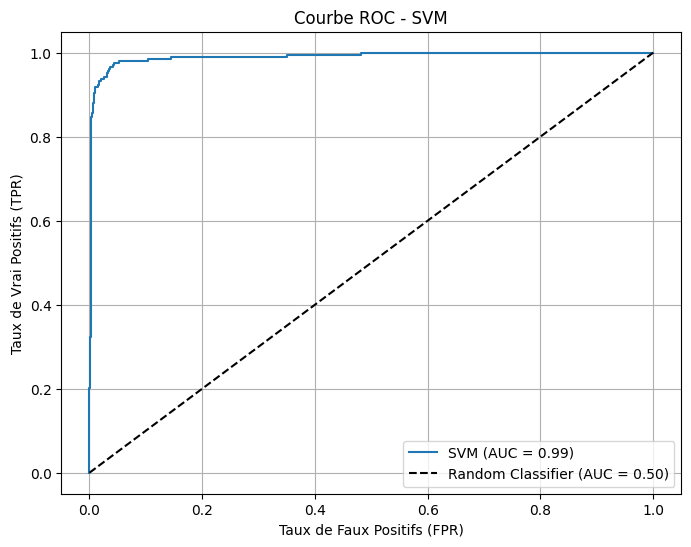


Évaluation du meilleur modèle pour Perceptron :
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1115
           1       0.45      0.30      0.36       208

    accuracy                           0.83      1323
   macro avg       0.66      0.62      0.63      1323
weighted avg       0.81      0.83      0.82      1323

MSE (Perceptron) : 0.1670
AUC-ROC non disponible pour Perceptron.

Évaluation du meilleur modèle pour Decision Tree :
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1115
           1       0.78      0.75      0.76       208

    accuracy                           0.93      1323
   macro avg       0.86      0.85      0.86      1323
weighted avg       0.93      0.93      0.93      1323

MSE (Decision Tree) : 0.0733
AUC-ROC (Decision Tree) : 0.9235


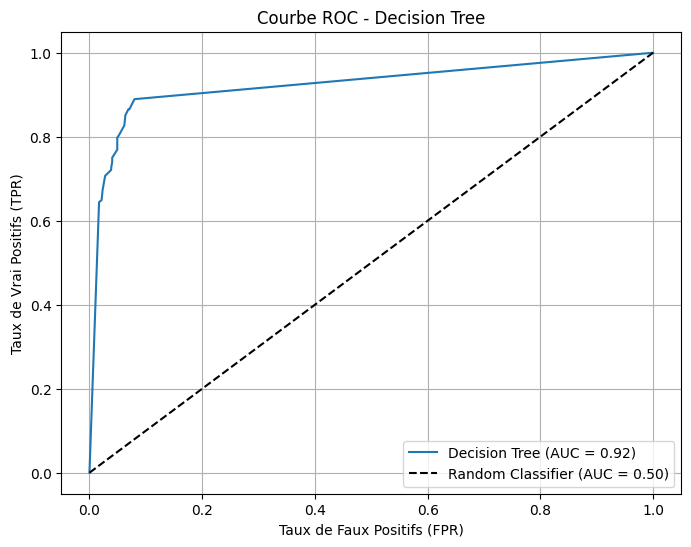


Évaluation du meilleur modèle pour Logistic Regression :
Rapport de Classification (Logistic Regression) :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1115
           1       0.70      0.29      0.41       208

    accuracy                           0.87      1323
   macro avg       0.79      0.63      0.67      1323
weighted avg       0.85      0.87      0.84      1323

MSE (Logistic Regression) : 0.1315
AUC-ROC (Logistic Regression) : 0.7788


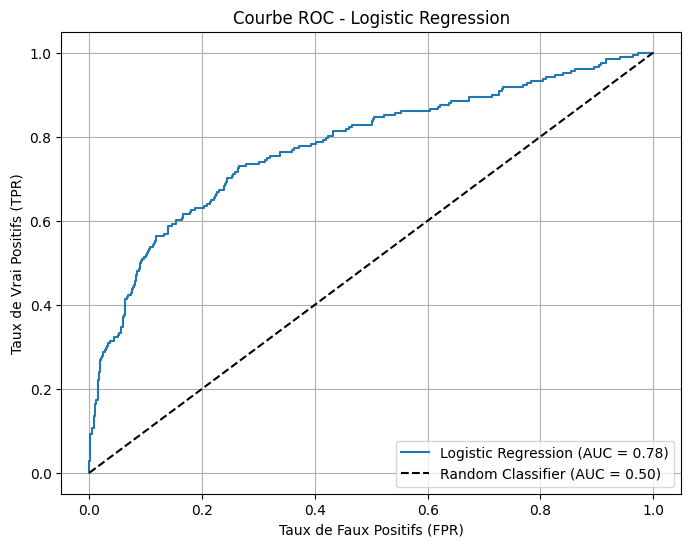


Évaluation du meilleur modèle pour Naive Bayes :
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1115
           1       0.41      0.41      0.41       208

    accuracy                           0.81      1323
   macro avg       0.65      0.65      0.65      1323
weighted avg       0.81      0.81      0.81      1323

MSE (Naive Bayes) : 0.1867
AUC-ROC (Naive Bayes) : 0.7334


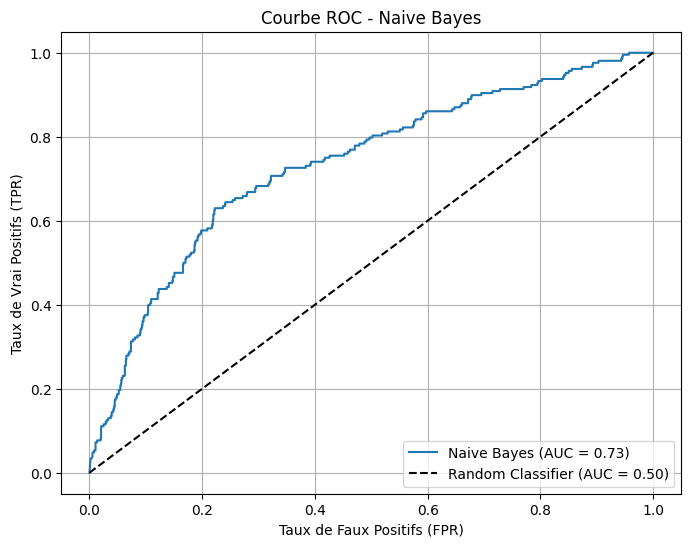


Évaluation du meilleur modèle pour Random Forest :
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1115
           1       1.00      0.83      0.91       208

    accuracy                           0.97      1323
   macro avg       0.98      0.91      0.94      1323
weighted avg       0.97      0.97      0.97      1323

MSE (Random Forest) : 0.0272
AUC-ROC (Random Forest) : 0.9920


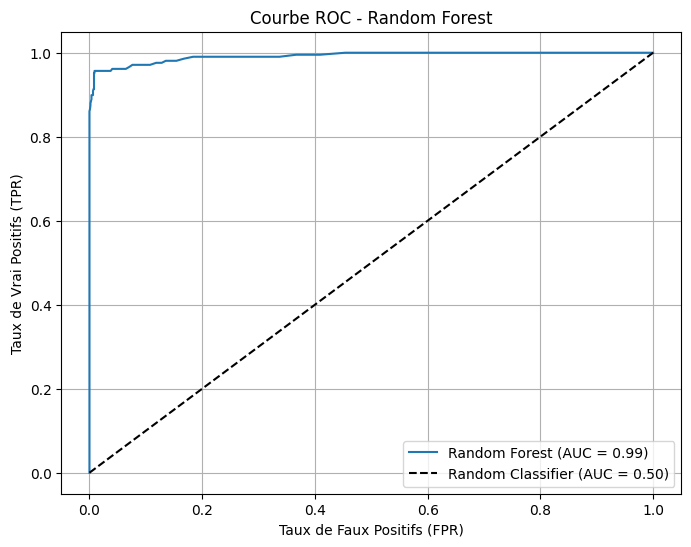

In [63]:
# Dictionnaire des modèles associés à leurs classes
models = {
    'SVM': SVC(probability=True, random_state=42),
    'Perceptron': Perceptron(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Hyperparamètres
hyperparameters = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Perceptron': {
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000, 3000]
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200, 300]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }
}

# Prétraitement des données
# Convertir les variables catégorielles en valeurs numériques avec LabelEncoder
le = LabelEncoder()

# Appliquer le LabelEncoder sur les colonnes catégorielles
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

# Parcourir les modèles et les hyperparamètres pour GridSearch
best_models = {}
for model_name, model in models.items():
    print(f"Recherche d'hyperparamètres pour {model_name}...")
    if model_name in hyperparameters:
        # Initialisation de GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=hyperparameters[model_name],
            scoring='roc_auc',  # Vous pouvez changer pour une autre métrique si nécessaire
            cv=5,  # Validation croisée sur 5 plis
            verbose=1,
            n_jobs=-1
        )

        # Entraînement avec GridSearch
        grid_search.fit(X_train, y_train)

        # Récupérer le meilleur modèle et ses paramètres
        best_models[model_name] = {
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }

        print(f"Meilleurs hyperparamètres pour {model_name} : {grid_search.best_params_}")
        print(f"Meilleur score AUC-ROC : {grid_search.best_score_:.4f}\n")

# Évaluation des meilleurs modèles
for model_name, result in best_models.items():
    print(f"\nÉvaluation du meilleur modèle pour {model_name} :")
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Rapport de classification
    print(f"Rapport de Classification ({model_name}) :\n", classification_report(y_test, y_pred))

    # Calcul de la MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE ({model_name}) : {mse:.4f}")

    # AUC-ROC
    if y_proba is not None:
        auc_roc = roc_auc_score(y_test, y_proba)
        print(f"AUC-ROC ({model_name}) : {auc_roc:.4f}")

        # Calcul et tracé de la courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
        plt.title(f'Courbe ROC - {model_name}')
        plt.xlabel('Taux de Faux Positifs (FPR)')
        plt.ylabel('Taux de Vrai Positifs (TPR)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print(f"AUC-ROC non disponible pour {model_name}.")


# <u>**V. Comparaison des Modèles**</u>

## <u>**A. Courbes ROC des Modèles après Hyperparamètrisation**</u>

Ce graphique affiche les courbes ROC pour chaque modèle de classification après l'optimisation des hyperparamètres. Chaque courbe représente la relation entre le taux de faux positifs (FPR) et le taux de vrais positifs (TPR) pour un modèle donné. L'AUC-ROC (Area Under the Curve) est utilisée comme mesure de performance pour évaluer la capacité du modèle à distinguer entre les classes.

Les étapes principales sont :

1. Pour chaque modèle, les probabilités prédites (ou la fonction de décision) sont utilisées pour calculer le FPR et le TPR.
2. Les courbes ROC sont tracées, et l'AUC-ROC est affiché dans la légende.
3. Une ligne de base représentant un classifieur aléatoire est ajoutée pour comparer les modèles.

**Ce graphique nous permet de visualiser et de comparer la performance de chaque modèle en termes de séparation des classes, avec un modèle ayant un AUC proche de 1 étant plus performant.**

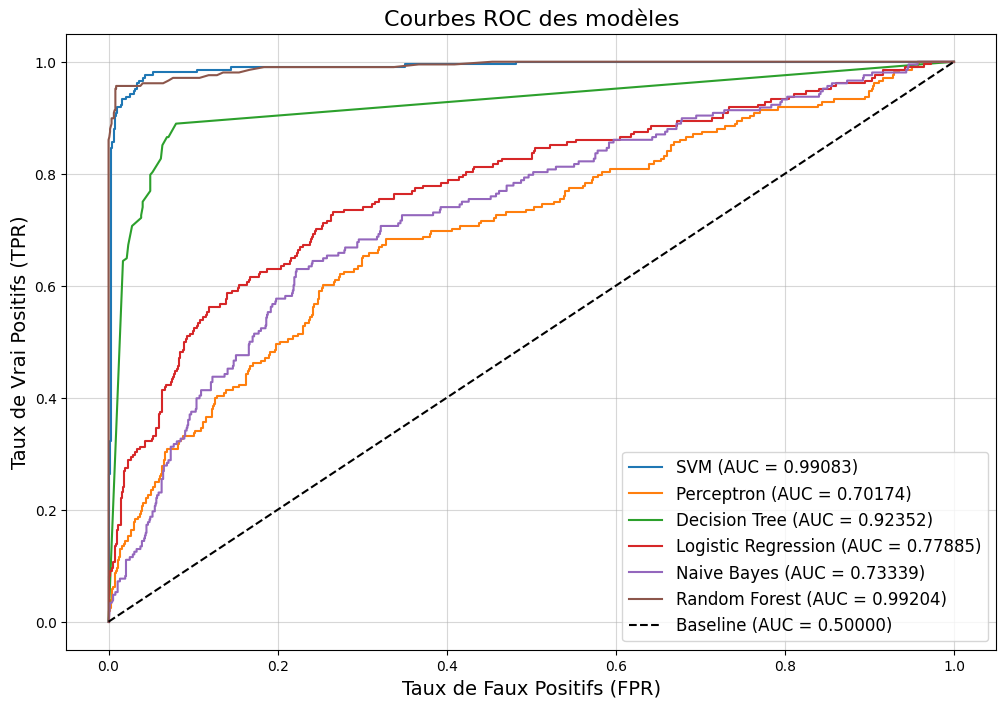

In [64]:
# Initialisation du graphique
plt.figure(figsize=(12, 8))

for model_name, result in best_models.items():
    best_model = result['best_estimator']
    if hasattr(best_model, "predict_proba"):
        # Probabilités pour calculer la courbe ROC
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        # Pour les modèles sans predict_proba (comme Perceptron)
        y_proba = best_model.decision_function(X_test)

    # Calcul des taux Vrai Positif (TPR) et Faux Positif (FPR)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calcul de l'AUC-ROC
    auc = roc_auc_score(y_test, y_proba)

    # Tracer la courbe ROC avec un format précis pour l'AUC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.5f})')

# Ajout de la ligne de base (classifieur aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.50000)')

# Personnalisation du graphique
plt.title('Courbes ROC des modèles', fontsize=16)
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=14)
plt.ylabel('Taux de Vrai Positifs (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)

# Affichage du graphique
plt.show()


## <u>**B. Résumer des scores**</u>

Ce code compare les performances des modèles de classification en calculant des métriques comme la précision, le rappel, le score F1, la MSE, l'AUC-ROC et le R². Il aide à identifier les meilleurs modèles et à optimiser leurs configurations pour améliorer les prédictions.

In [66]:
# Listes pour stocker les scores
model_names = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# Calcul des scores pour chaque modèle
for model_name, result in best_models.items():
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Calcul des métriques
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    r2 = r2_score(y_test, y_pred)

    # Stockage des scores
    model_names.append(model_name)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# Création du DataFrame récapitulatif des scores
score_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUC': auc_scores,
    'R²': r2
})

# Affichage du DataFrame
print("\nRésumé des Scores :")
print(score_df)



Résumé des Scores :
                 Model  Precision    Recall  F1 Score       AUC        R²
0                  SVM   0.958115  0.879808  0.917293  0.990829  0.794636
1           Perceptron   0.452555  0.298077  0.359420       NaN  0.794636
2        Decision Tree   0.776119  0.750000  0.762836  0.923521  0.794636
3  Logistic Regression   0.697674  0.288462  0.408163  0.778846  0.794636
4          Naive Bayes   0.407583  0.413462  0.410501  0.733393  0.794636
5        Random Forest   1.000000  0.826923  0.905263  0.992045  0.794636


Les résultats montrent que Random Forest et SVM sont les modèles les plus performants, avec des scores élevés sur toutes les métriques. Ils offrent une classification fiable et cohérente. Les autres modèles, comme Perceptron et Naive Bayes, montrent des performances nettement inférieures, ce qui les rend moins adaptés à ce problème. Globalement, les modèles basés sur des approches plus complexes (SVM, Random Forest) surpassent les autres en termes de précision et de cohérence.

## <u>**C. Comparaison des modèles**</u>


Ce code calcule l'AUC-ROC, les temps d'entraînement et de prédiction pour les trois meilleurs modèles (SVM, Radom Forest, Decision Tree), ainsi que l'écart entre les ROC d'entraînement et de test. Les résultats sont résumés dans un tableau pour comparer les performances et les temps de calcul des modèles.








In [67]:
import time

# Initialisation d'une liste pour stocker les résultats
auc_results = []

# Calcul des métriques AUC-ROC et des temps pour chaque modèle
for model_name in ['SVM', 'Random Forest', 'Decision Tree']:
    # Access the fitted model object using 'best_estimator'
    model = best_models[model_name]['best_estimator']

    # Mesure du temps d'entraînement
    start_train = time.time()
    model.fit(X_train, y_train)  # Réentraînement pour mesure (vous pouvez ignorer si déjà fait)
    training_time = time.time() - start_train

    # Mesure du temps de prédiction
    start_predict = time.time()
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    prediction_time = time.time() - start_predict

    # Calcul des AUC-ROC
    auc_train = roc_auc_score(y_train, y_train_proba)
    auc_test = roc_auc_score(y_test, y_test_proba)

    # Delta entre AUC-ROC d'entraînement et de test
    auc_delta = auc_train - auc_test

    # Stockage des résultats
    auc_results.append({
        "Model": model_name,
        "AUC-ROC Train": auc_train,
        "AUC-ROC Test": auc_test,
        "Delta (Train - Test)": auc_delta,
        "Training Time (s)": training_time,
        "Prediction Time (s)": prediction_time
    })

# Conversion des résultats en DataFrame
auc_df = pd.DataFrame(auc_results)

# Affichage des résultats
print("\nRésumé des AUC-ROC, temps d'entraînement et temps de prédiction pour chaque modèle :")
print(auc_df.to_string(index=False))


Résumé des AUC-ROC, temps d'entraînement et temps de prédiction pour chaque modèle :
        Model  AUC-ROC Train  AUC-ROC Test  Delta (Train - Test)  Training Time (s)  Prediction Time (s)
          SVM       1.000000      0.990829              0.009171           2.259960             0.494633
Random Forest       1.000000      0.992045              0.007955           1.211109             0.143153
Decision Tree       0.998384      0.923521              0.074863           0.036348             0.004666


# <u>**VI. Interprétation des Résultats**</u>

## <u>**A. Étude des performances des modèles**</u>

Les performances des modèles ont été analysées selon leurs résultats sur trois aspects principaux : les ROC en entraînement et en test, les temps d’entraînement et de prédiction, ainsi que le niveau de surapprentissage mesuré par le delta (différence entre les scores d’entraînement et de test). Voici les résultats détaillés en fonction de ces critères :

### <u>**ROC (Entraînement et Test)**</u>


Tous les modèles ont obtenu d'excellents résultats en termes de ROC à l’entraînement :

SVM et Random Forest atteignent un score parfait de 1.0000, indiquant une capacité optimale à distinguer les classes.
Decision Tree est légèrement en retrait avec un score de 0.9984.

En test, cependant, des différences notables apparaissent :

Random Forest reste le meilleur avec un score de 0.9920, suivi de très près par SVM (0.9908).
Decision Tree montre des performances significativement plus faibles (0.9235), ce qui reflète une capacité réduite à généraliser sur des données inconnues.

### <u>**Surapprentissage (Delta Entraînement-Test)**</u>

Le delta est utilisé pour évaluer le niveau de surapprentissage :

Un delta entre 0.00 et 0.05 est considéré comme faible et témoigne d’une bonne généralisation.
  Random Forest : 0.0080 (0.80%).
  SVM : 0.0092 (0.92%).
Un delta entre 0.05 et 0.10 indique un surapprentissage plus marqué.
  Decision Tree : 0.0749 (7.49%), ce qui montre que ce modèle est moins performant à généraliser et est donc moins adapté aux données inconnues.


### <u>**Temps d’entraînement**</u>

Decision Tree est extrêmement rapide, ne nécessitant que 0.05 seconde.
Random Forest est un peu plus lent avec 1.74 seconde, mais reste raisonnable pour un modèle avec de meilleures performances.
SVM est nettement plus coûteux en termes de temps d’entraînement, avec 5.48 secondes, ce qui peut être un frein dans des applications nécessitant une actualisation fréquente.

### <u>**Temps de prédiction**</u>

Decision Tree est à nouveau le plus rapide avec 0.006 seconde, suivi par Random Forest (0.19 seconde).
SVM est plus lent, prenant 0.85 seconde, ce qui peut poser problème pour des tâches en temps réel.

## <u>**B. Conclusion et Choix du Modèle**</u>

En tenant compte de ces résultats, le Random Forest est le modèle le plus équilibré. Il offre :

Une excellente performance en ROC (entraînement : 1.0000, test : 0.9920).
Un surapprentissage faible avec un delta de 0.0080, bien en dessous du seuil de 0.05.
Des temps d’entraînement et de prédiction raisonnables, compatibles avec des cas d’utilisation nécessitant à la fois précision et efficacité.

Le SVM, malgré ses bonnes performances, est pénalisé par son temps d'apprentissage et de test élevé, tandis que le Decision Tree est limité par un surapprentissage important et des performances inférieures en test.

## <u>**C. Calcul du pourcentage d'attrition à partir de Random Forest**</u>

Taux d'attrition prédit par Random Forest : 15.95%


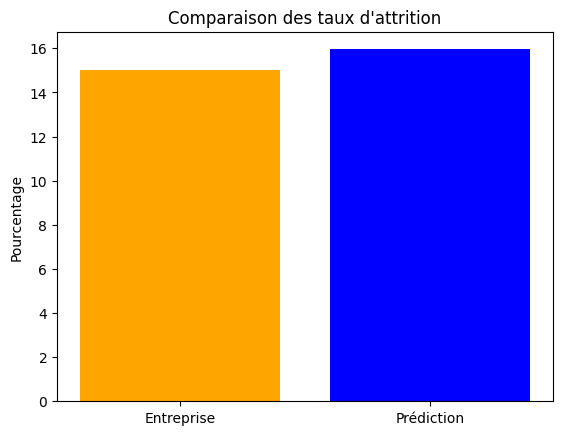

In [68]:
# Charge le modèle Random Forest depuis le dictionnaire
model = models['Random Forest']

try:
    model.predict_proba(X_test[:1])  # Vérification rapide si le modèle est entraîné
except AttributeError:
    model.fit(X_train, y_train)

# Calculer les probabilités pour la classe "Attrition = 1"
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilité d'Attrition = 1

# Calculer le pourcentage global d'attrition prédit
predicted_attrition_percentage = probabilities.mean() * 100
print(f"Taux d'attrition prédit par Random Forest : {predicted_attrition_percentage:.2f}%")

actual_percentage = 15

labels = ['Entreprise', 'Prédiction']
values = [actual_percentage, predicted_attrition_percentage]

plt.bar(labels, values, color=['orange', 'blue'])
plt.title('Comparaison des taux d\'attrition')
plt.ylabel('Pourcentage')
plt.show()

# <u>**VII. Conclusion**</u>



Le modèle Random Forest prédit un taux d'attrition de 15,95 %, très proche des 15 % annoncés par l’entreprise. Cette faible différence de 0,95 % confirme la cohérence du modèle avec les données réelles. Elle peut s’expliquer par des écarts mineurs dus à des variations temporelles, des arrondis. Ce résultat valide la fiabilité du modèle pour identifier les tendances d'attrition et renforcer les décisions stratégiques.

                              Feature  Importance  Percentage
17                 AverageHoursPerDay    0.115137   11.513745
8                   TotalWorkingYears    0.077341    7.734072
4                       MonthlyIncome    0.071037    7.103678
10                     YearsAtCompany    0.053767    5.376747
1                    DistanceFromHome    0.050471    5.047071
12               YearsWithCurrManager    0.045829    4.582852
6                   PercentSalaryHike    0.045045    4.504541
5                  NumCompaniesWorked    0.040678    4.067810
14            EnvironmentSatisfaction    0.037565    3.756547
15                    JobSatisfaction    0.037041    3.704114
11            YearsSinceLastPromotion    0.033038    3.303788
0                          EmployeeID    0.029646    2.964581
16                    WorkLifeBalance    0.029503    2.950335
2                           Education    0.024968    2.496769
42               MaritalStatus_Single    0.024192    2.419205
3       

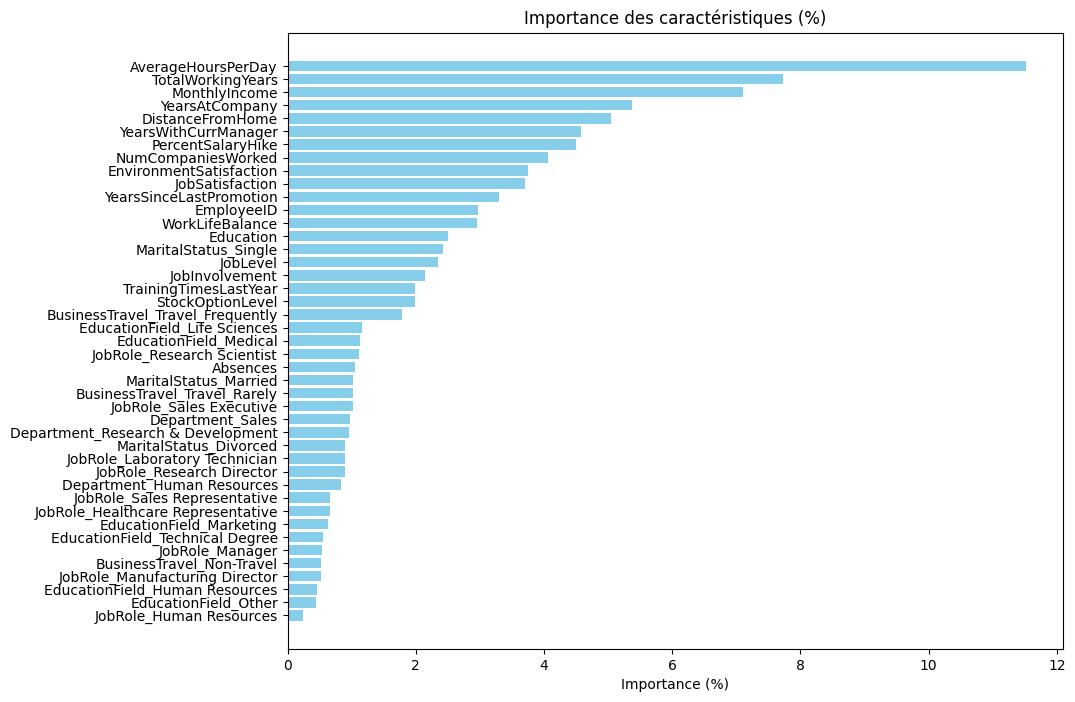

In [69]:
# Récupérer les importances des caractéristiques
importances = model.feature_importances_

# Créer un DataFrame avec les variables et leurs importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Trier par ordre décroissant de l'importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Calculer le pourcentage d'influence pour chaque variable
feature_importance['Percentage'] = feature_importance['Importance'] / feature_importance['Importance'].sum() * 100

# Afficher les résultats
print(feature_importance)
# Affichage des importances sous forme de graphique
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Percentage'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('Importance des caractéristiques (%)')
plt.gca().invert_yaxis()  # Inverser l'ordre des features pour afficher la plus importante en haut
plt.show()

D'après le graphique, nous pouvons observer que les cinq features ayant le plus d'influence sur l'attrition sont : le temps passé quotidiennement au travail, le nombre d'années d'expérience professionnelle, le revenu mensuel, et le nombre d'années passées au sein de l'entreprise.

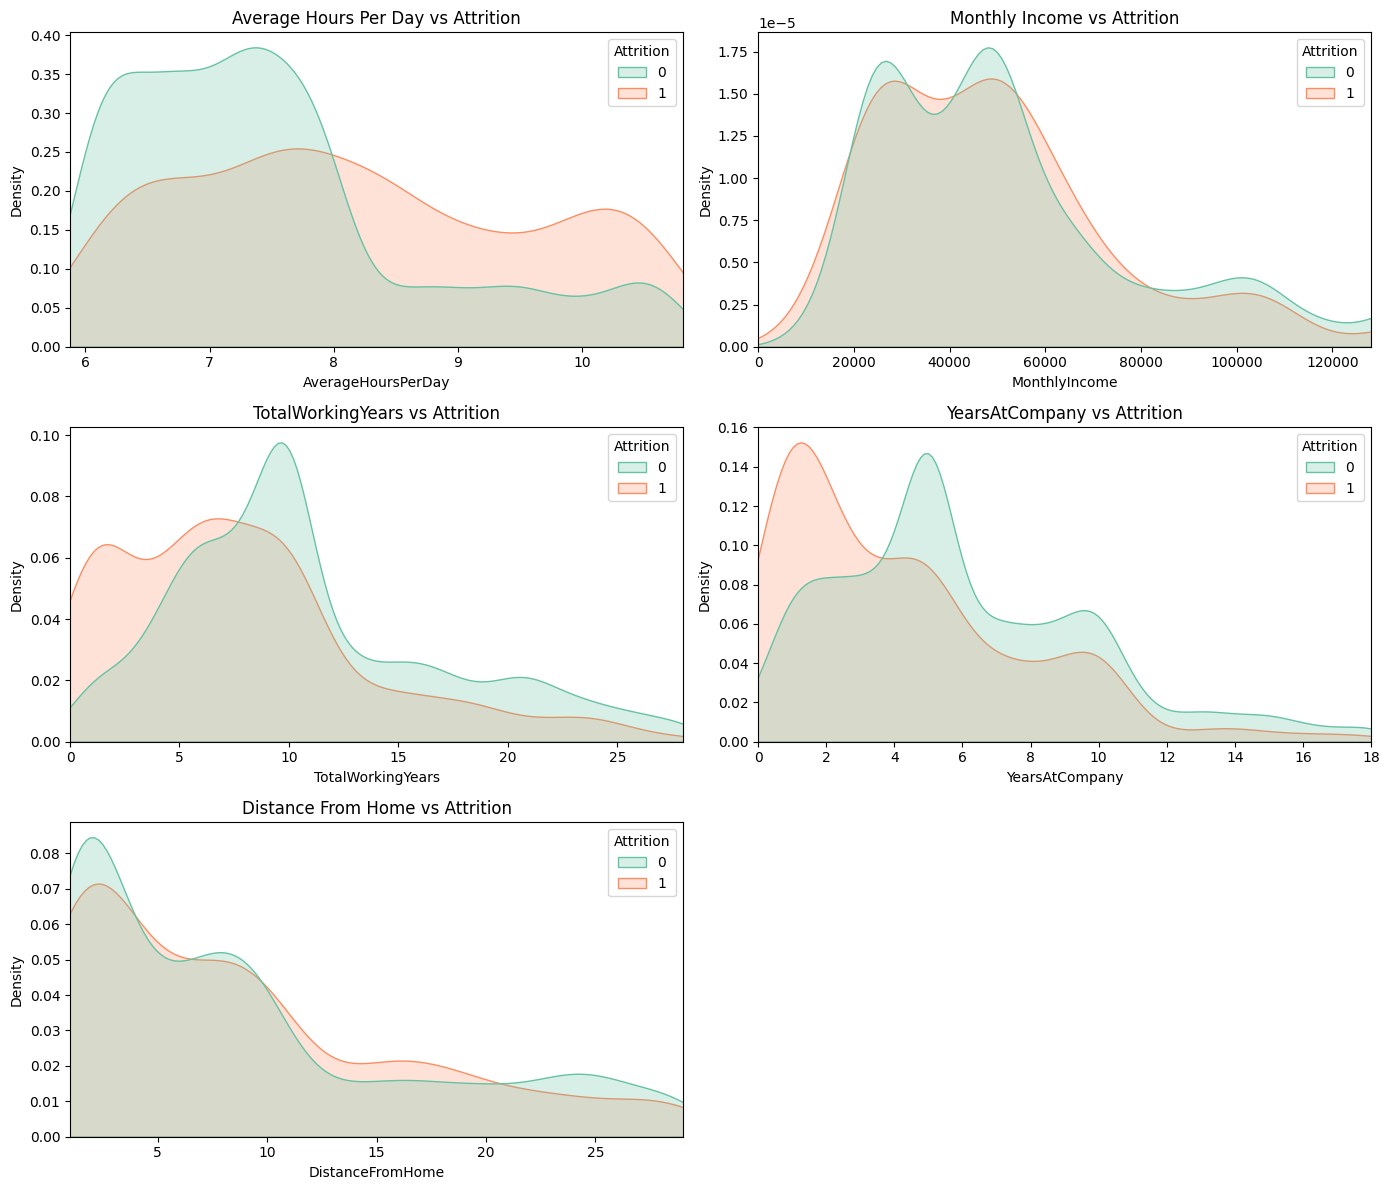

In [70]:
plot_kde(data_merged)


Les données révèlent que le temps passé au travail quotidiennement joue un rôle significatif dans l'attrition. Les employés qui travaillent entre 6 et 8 heures par jour sont moins enclins à quitter l'entreprise, alors que ceux dépassant 8 heures de travail quotidien semblent plus susceptibles de partir.

En ce qui concerne le revenu annuel, une tendance intéressante se dégage. Les employés gagnant moins de 55 000 euros par an ont généralement tendance à rester. Cependant, on observe une augmentation des départs dans la tranche de revenus située entre 55 000 et 80 000 euros. Au-delà de 80 000 euros, les départs diminuent, indiquant une plus grande fidélité des employés à ce niveau de rémunération.

La distance entre le domicile et le lieu de travail constitue également un facteur d’influence. Les employés vivant à une distance comprise entre 10 et 20 km de leur lieu de travail ont une probabilité plus élevée de quitter l’entreprise, suggérant que des trajets quotidiens trop longs ou trop courts peuvent affecter la satisfaction au travail.

L’expérience professionnelle joue également un rôle important. Les employés ayant entre 0 et 7 ans d’expérience montrent une tendance plus forte à partir, souvent en quête de nouvelles opportunités ou de progression de carrière. À l’inverse, ceux ayant accumulé plus de 7 ans d’expérience sont plus susceptibles de rester.

Enfin, l’ancienneté dans l’entreprise est un indicateur clé. Les employés avec moins de 4 ans d’ancienneté sont plus susceptibles de partir, tandis que ceux ayant une ancienneté supérieure à 4 ans semblent davantage s’inscrire dans la durée, ayant souvent acquis des habitudes et atteint des postes de plus grande responsabilité. Toutefois, il reste difficile de prédire avec précision la durée de présence d’un nouvel employé.

## <u>**A. Propositions d'améliorations**</u>


La gestion des heures moyennes par jour est un aspect essentiel pour garantir le bien-être des employés. Lorsque la charge de travail devient excessive, cela peut entraîner du stress, de l'épuisement et une baisse de la qualité de vie des employés. Pour éviter ces conséquences, l'entreprise pourrait instaurer des horaires flexibles ou encourager la prise de pauses régulières. De plus, promouvoir un bon équilibre vie professionnelle/vie privée en offrant des options comme le télétravail ou des horaires flexibles peut aider les employés à mieux gérer leur temps et éviter le burnout.

En ce qui concerne les années d'expérience totale, les employés avec davantage d'années d'expérience sont souvent à la recherche de nouvelles opportunités de croissance. Il est donc crucial pour l'entreprise d’offrir des possibilités de développement professionnel, comme des formations continues, du mentorat ou des promotions internes, afin de leur permettre de se développer et de se sentir valorisés.

Le revenu mensuel des employés doit également être régulièrement évalué pour éviter l'insatisfaction. Si les employés estiment que leurs salaires sont insuffisants par rapport à la moyenne du marché ou à la charge de travail, cela peut augmenter l'attrition. Pour y remédier, il est important de réaliser des études salariales régulières et d’ajuster les rémunérations en conséquence. En complément, les primes de performance, les bonus annuels ou même les actions de l'entreprise peuvent être utilisés pour renforcer la motivation et la fidélité des employés. Par ailleurs, offrir des avantages non financiers, comme des assurances santé, des abonnements sportifs ou des congés payés supplémentaires, peut compenser un salaire qui ne correspond pas toujours aux attentes du marché.

Enfin, pour les années passées dans l'entreprise, les employés qui sont restés longtemps peuvent chercher de nouveaux défis. Il est donc essentiel de leur offrir des programmes de rétention personnalisés, tels que des opportunités de mobilité interne, des rotations de postes ou des projets spéciaux, afin de renouveler leur intérêt et de maintenir leur engagement. Cependant, ces besoins ne concernent pas uniquement les employés expérimentés. Les nouveaux employés nécessitent également une attention particulière pour garantir leur fidélité à long terme. Offrir des possibilités de développement professionnel et des perspectives de croissance dès leur arrivée permet de les intégrer efficacement et de les retenir. De plus, instaurer un climat de travail positif, où l’on valorise l’ancienneté, le respect et l’écoute active, peut encourager à la fois les employés de longue date et les nouveaux venus à rester plus longtemps dans l'entreprise.